In [15]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [16]:
my_url = "http://floatingmedia.com/columbia/BBC.html"
raw_html = urlopen(my_url).read()
doc = BeautifulSoup(raw_html, "html.parser")

In [17]:
import re

In [18]:
all_info = doc.find('div', attrs={'class': 'body-content'})
all_info

<div class="body-content">
<p>Communicating with 177 film critics is a time-consuming process. But for every critic who participated – and many more were invited – it wasn’t just a matter of lending their expertise; it was about sharing their passion. The critics who participated hail from 36 countries: 81 from the US, 19 from the UK, five each from Canada, Cuba, France, and Germany, and four each from Australia, Colombia, India, Israel and Italy. Lebanon, the UAE, China, Bangladesh, Chile, Namibia, Kazakhstan and many others are represented too. Of the 177 critics, 55 are women and 122 are men. We present their votes here in alphabetical order.</p><p><strong>Simon Abrams – Freelance film critic (US)</strong></p><p>1. Mulholland Drive (David Lynch, 2001)<br/>2. In the Mood for Love (Wong Kar-wai, 2000)<br/>3. The Tree of Life (Terrence Malick, 2011)<br/>4. Yi Yi: A One and a Two (Edward Yang, 2000)<br/>5. Goodbye to Language (Jean-Luc Godard, 2014)<br/>6. The White Meadows (Mohammad Ra

In [19]:
movies = []
my_reg = r"^(\d\d*)[.](.+)[(]([',.\w\s-]+), (\d{4})[)]$"
crit_regex = r"^([\w\s-]+) – (.+) [(]([\w\s-]+)[)]$"
all_p = all_info.find_all('p')
for line in all_p:
    if line.strong is not None:
        critic = line.strong.string
        each_crit = re.findall(crit_regex,critic)
        movie = line.next_sibling
        each_movie = movie.find_all(string=True)
        for the_movie in each_movie:
            this_m = re.findall(my_reg,the_movie)
            if len(this_m) > 0:
                this_movie = list(this_m[0])
                rank = this_movie.pop(0)
                this_movie.append(rank)
                whole_entry = this_movie + (list(each_crit[0]))
                movies.append(whole_entry)

In [20]:
import pandas as pd

In [21]:
movies

[[' Mulholland Drive ',
  'David Lynch',
  '2001',
  '1',
  'Simon Abrams',
  'Freelance film critic',
  'US'],
 [' In the Mood for Love ',
  'Wong Kar-wai',
  '2000',
  '2',
  'Simon Abrams',
  'Freelance film critic',
  'US'],
 [' The Tree of Life ',
  'Terrence Malick',
  '2011',
  '3',
  'Simon Abrams',
  'Freelance film critic',
  'US'],
 [' Yi Yi: A One and a Two ',
  'Edward Yang',
  '2000',
  '4',
  'Simon Abrams',
  'Freelance film critic',
  'US'],
 [' Goodbye to Language ',
  'Jean-Luc Godard',
  '2014',
  '5',
  'Simon Abrams',
  'Freelance film critic',
  'US'],
 [' The White Meadows ',
  'Mohammad Rasoulof',
  '2009',
  '6',
  'Simon Abrams',
  'Freelance film critic',
  'US'],
 [' Night Across the Street ',
  'Raoul Ruiz',
  '2012',
  '7',
  'Simon Abrams',
  'Freelance film critic',
  'US'],
 [' Certified Copy ',
  'Abbas Kiarostami',
  '2010',
  '8',
  'Simon Abrams',
  'Freelance film critic',
  'US'],
 [' Sparrow ',
  'Johnnie To',
  '2008',
  '9',
  'Simon Abrams',


In [22]:
import numpy as np
col_names = ['movie', 'director', 'm_year', 'crit_rank','critic','crit_org','crit_cn']
df = pd.DataFrame.from_records(movies, columns=col_names)
df.loc[53]

movie          Pan's Labyrinth 
director     Guillermo Del Toro
m_year                     2006
crit_rank                     4
critic               Tim Appelo
crit_org               The Wrap
crit_cn                      US
Name: 53, dtype: object

In [23]:
df.shape

(1770, 7)

In [24]:
%matplotlib inline

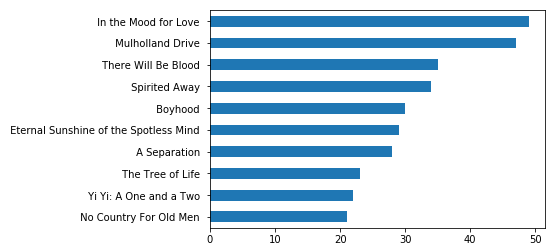

In [25]:
#TEN MOST VOTED MOVIES BY CRITICS
df['movie'].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh')

In [26]:
df['m_year'].value_counts()

2000    155
2001    145
2007    135
2014    130
2012    127
2011    126
2013    120
2002    110
2006    101
2009     94
2004     93
2008     92
2010     91
2015     87
2003     82
2005     71
2016     11
Name: m_year, dtype: int64

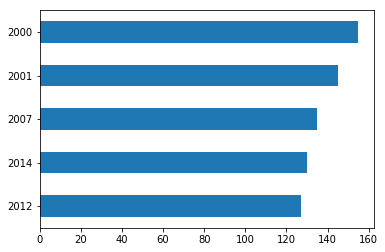

In [27]:
# YEARS WHEN MOST OF THE PICKED MOVIES WERE PRODUCED 
df['m_year'].value_counts().sort_values(ascending=True).tail(5).plot(kind='barh')

In [28]:
df1 = df.groupby('crit_cn')['movie'].value_counts().reset_index(name='count')
df1[30:]

,crit_cn,movie,count
30,Australia,Distant,1
31,Australia,Femme Fatale,1
32,Australia,Film socialisme,1
33,Australia,Frontier of Dawn,1
34,Australia,Holy Motors,1
35,Australia,I Don't Want to Sleep Alone,1
36,Australia,In the Mood for Love,1
37,Australia,Instructions for a Light and Sound Machine,1
38,Australia,Kung Fu Hustle,1
39,Australia,Leviathan,1


In [29]:
df1["string"] = df1["movie"] + ": " + df1["count"].map(str) + np.where(df1["count"]>1, ' votes', ' vote')
df1.head()

,crit_cn,movie,count,string
0,Argentina,Spirited Away,2,Spirited Away : 2 votes
1,Argentina,Adventureland,1,Adventureland : 1 vote
2,Argentina,Boyhood,1,Boyhood : 1 vote
3,Argentina,Elephant,1,Elephant : 1 vote
4,Argentina,Extraordinary Stories,1,Extraordinary Stories : 1 vote


In [30]:
#GETTING AN ARTICLE FOR EACH CRITIC COUNTRY 
output = df1.groupby('crit_cn')['string'].apply(lambda x: "<p>%s</p>" % '</p><p> '.join(x)).reset_index(name='article')
output

,crit_cn,article
0,Argentina,<p> Spirited Away : 2 votes</p><p> Adventurel...
1,Australia,<p> A Separation : 2 votes</p><p> A Vingança ...
2,Austria,<p> Platform : 2 votes</p><p> Secret Sunshine...
3,Bangladesh,<p> A Separation : 1 vote</p><p> Babel : 1 vo...
4,Belgium,<p> Amores Perros : 1 vote</p><p> Boyhood : 1...
5,Brazil,<p> Birdman : 1 vote</p><p> Brokeback Mountai...
6,Canada,<p> In the Mood for Love : 2 votes</p><p> Ins...
7,Chile,<p> A History of Violence : 1 vote</p><p> Bef...
8,China,<p> A Separation : 1 vote</p><p> Birdman : 1 ...
9,Colombia,<p> A Separation : 3 votes</p><p> A Prophet :...


In [31]:
crits = df.groupby('crit_cn')['critic'].nunique().reset_index(name='headline')
output = output.merge(crits, how='left', on='crit_cn')

In [32]:
output

,crit_cn,article,headline
0,Argentina,<p> Spirited Away : 2 votes</p><p> Adventurel...,2
1,Australia,<p> A Separation : 2 votes</p><p> A Vingança ...,4
2,Austria,<p> Platform : 2 votes</p><p> Secret Sunshine...,2
3,Bangladesh,<p> A Separation : 1 vote</p><p> Babel : 1 vo...,1
4,Belgium,<p> Amores Perros : 1 vote</p><p> Boyhood : 1...,1
5,Brazil,<p> Birdman : 1 vote</p><p> Brokeback Mountai...,1
6,Canada,<p> In the Mood for Love : 2 votes</p><p> Ins...,5
7,Chile,<p> A History of Violence : 1 vote</p><p> Bef...,2
8,China,<p> A Separation : 1 vote</p><p> Birdman : 1 ...,1
9,Colombia,<p> A Separation : 3 votes</p><p> A Prophet :...,4


In [33]:
#GETTING A HEADLINE
output['headline'] = output['headline'].map(str) + np.where(output['headline']>1, ' critics', ' critic')

In [34]:
output

,crit_cn,article,headline
0,Argentina,<p> Spirited Away : 2 votes</p><p> Adventurel...,2 critics
1,Australia,<p> A Separation : 2 votes</p><p> A Vingança ...,4 critics
2,Austria,<p> Platform : 2 votes</p><p> Secret Sunshine...,2 critics
3,Bangladesh,<p> A Separation : 1 vote</p><p> Babel : 1 vo...,1 critic
4,Belgium,<p> Amores Perros : 1 vote</p><p> Boyhood : 1...,1 critic
5,Brazil,<p> Birdman : 1 vote</p><p> Brokeback Mountai...,1 critic
6,Canada,<p> In the Mood for Love : 2 votes</p><p> Ins...,5 critics
7,Chile,<p> A History of Violence : 1 vote</p><p> Bef...,2 critics
8,China,<p> A Separation : 1 vote</p><p> Birdman : 1 ...,1 critic
9,Colombia,<p> A Separation : 3 votes</p><p> A Prophet :...,4 critics


In [35]:
#ASSIGN A COLOR
output['color'] = "#000066"
output

,crit_cn,article,headline,color
0,Argentina,<p> Spirited Away : 2 votes</p><p> Adventurel...,2 critics,#000066
1,Australia,<p> A Separation : 2 votes</p><p> A Vingança ...,4 critics,#000066
2,Austria,<p> Platform : 2 votes</p><p> Secret Sunshine...,2 critics,#000066
3,Bangladesh,<p> A Separation : 1 vote</p><p> Babel : 1 vo...,1 critic,#000066
4,Belgium,<p> Amores Perros : 1 vote</p><p> Boyhood : 1...,1 critic,#000066
5,Brazil,<p> Birdman : 1 vote</p><p> Brokeback Mountai...,1 critic,#000066
6,Canada,<p> In the Mood for Love : 2 votes</p><p> Ins...,5 critics,#000066
7,Chile,<p> A History of Violence : 1 vote</p><p> Bef...,2 critics,#000066
8,China,<p> A Separation : 1 vote</p><p> Birdman : 1 ...,1 critic,#000066
9,Colombia,<p> A Separation : 3 votes</p><p> A Prophet :...,4 critics,#000066


In [36]:
import geopandas as gpd
geo_file = "/Users/chrisgavalas/Downloads/countries.geojson"
countries = gpd.read_file(geo_file)
countries[150:]

,geometry,id,name
150,(POLYGON ((10.92709270927094 33.89325605857856...,TUN,Tunisia
151,(POLYGON ((25.97659765976599 40.15886829696349...,TUR,Turkey
152,(POLYGON ((39.9099909990999 -7.747249329707941...,TZA,Tanzania
153,"POLYGON ((34.43744374437443 3.66760771037864, ...",UGA,Uganda
154,(POLYGON ((32.16921692169217 46.15934326913614...,UKR,Ukraine
155,"POLYGON ((-56.003600360036 -30.80023689721776,...",URY,Uruguay
156,(POLYGON ((144.8244824482449 13.44977737431591...,USA,USA
157,(POLYGON ((71.66516651665168 39.93559480962683...,UZB,Uzbekistan
158,(POLYGON ((-61.40414041404141 8.57962443178509...,VEN,Venezuela
159,"(POLYGON ((103.996399639964 10.44953988822959,...",VNM,Vietnam


In [37]:
output['crit_cn'] = output['crit_cn'].str.replace("US", "USA")

In [38]:
output['crit_cn'] = output['crit_cn'].str.replace("UK", "United Kingdom")

In [39]:
output

,crit_cn,article,headline,color
0,Argentina,<p> Spirited Away : 2 votes</p><p> Adventurel...,2 critics,#000066
1,Australia,<p> A Separation : 2 votes</p><p> A Vingança ...,4 critics,#000066
2,Austria,<p> Platform : 2 votes</p><p> Secret Sunshine...,2 critics,#000066
3,Bangladesh,<p> A Separation : 1 vote</p><p> Babel : 1 vo...,1 critic,#000066
4,Belgium,<p> Amores Perros : 1 vote</p><p> Boyhood : 1...,1 critic,#000066
5,Brazil,<p> Birdman : 1 vote</p><p> Brokeback Mountai...,1 critic,#000066
6,Canada,<p> In the Mood for Love : 2 votes</p><p> Ins...,5 critics,#000066
7,Chile,<p> A History of Violence : 1 vote</p><p> Bef...,2 critics,#000066
8,China,<p> A Separation : 1 vote</p><p> Birdman : 1 ...,1 critic,#000066
9,Colombia,<p> A Separation : 3 votes</p><p> A Prophet :...,4 critics,#000066


In [40]:
output_new = pd.merge(output,countries[['name','geometry']],left_on='crit_cn', right_on='name', how='left')

In [45]:
output_new

,crit_cn,article,headline,color,name,geometry,group_id
0,Argentina,<p> Spirited Away : 2 votes</p><p> Adventurel...,2 critics,#000066,Argentina,(POLYGON ((-68.64086408640864 -54.885864343659...,0
1,Australia,<p> A Separation : 2 votes</p><p> A Vingança ...,4 critics,#000066,Australia,(POLYGON ((73.35733573357336 -53.0159488872151...,0
2,Austria,<p> Platform : 2 votes</p><p> Secret Sunshine...,2 critics,#000066,Austria,"POLYGON ((16.07560756075608 48.74094296646624,...",0
3,Bangladesh,<p> A Separation : 1 vote</p><p> Babel : 1 vo...,1 critic,#000066,Bangladesh,(POLYGON ((91.93519351935197 21.71089640577222...,0
4,Belgium,<p> Amores Perros : 1 vote</p><p> Boyhood : 1...,1 critic,#000066,Belgium,"POLYGON ((5.022502250225017 51.47604318634029,...",0
5,Brazil,<p> Birdman : 1 vote</p><p> Brokeback Mountai...,1 critic,#000066,Brazil,(POLYGON ((-48.55085508550854 -27.813954004089...,0
6,Canada,<p> In the Mood for Love : 2 votes</p><p> Ins...,5 critics,#000066,Canada,(POLYGON ((-66.76867686768676 44.7499293803234...,0
7,Chile,<p> A History of Violence : 1 vote</p><p> Bef...,2 critics,#000066,Chile,(POLYGON ((-67.56075607560756 -55.806867478923...,0
8,China,<p> A Separation : 1 vote</p><p> Birdman : 1 ...,1 critic,#000066,China,(POLYGON ((110.6930693069307 20.14798199441563...,0
9,Colombia,<p> A Separation : 3 votes</p><p> A Prophet :...,4 critics,#000066,Colombia,(POLYGON ((-77.35373537353735 4.26765520759590...,0


In [46]:
output_new['group_id'] = 0

In [47]:
from geopandas import GeoDataFrame
geo_output = GeoDataFrame(output_new)

In [90]:
geo_output.dropna().to_file("critics_new_file.json", driver="GeoJSON")

In [91]:
this_critic = []
critics_list = []
director_list = []
all_p = all_info.find_all('p')
movie_list = []
for p_line in all_p:
    if p_line.strong is not None:
        try:
            this_critic = []
            critic_info = p_line.strong.string
            regex_one = r"(^[\w-]+\s\w+)"
            name = re.findall(regex_one, critic_info)[0]
            regex_two = r"– (.*) [(]"
            media = re.findall(regex_two, critic_info)[0]
            regex_three = r"(?<=\().+?(?=\))"
            country = re.findall(regex_three, critic_info)[0]
            this_critic.append(name)
            this_critic.append(media)
            this_critic.append(country)
           #print(this_critic)
            movie_info = p_line.next_sibling
            each_movie = movie_info.find_all(string=True)
            for movie in each_movie:
                try:
                    this_movie = []
                    regex1 = r"^\d{1,2}.([^\(]+)"
                    title = re.findall(regex1, movie)[0]
                    regex2 = r"[(](.+?),"
                    director = re.findall(regex2, movie)[0]
                    regex3 = r",([^-]+)"
                    year = re.findall(regex3, movie)[0]
                    this_movie.append(title)
                    this_movie.append(director)
                    this_movie.append(year)
                    movie_list.append(this_movie)
                    director_list.append(director)
                    this_critic.append(title)
                except:
                    print("failed on", movie)
       #print(movie_list)
       #print(this_critic)
       #print(directors_list)
            critics_list.append(this_critic)
        except:
            print("failed on")
       #print(critics_list)

failed on


In [50]:
df_director = pd.DataFrame(director_list)
df_director

,0
0,David Lynch
1,Wong Kar-wai
2,Terrence Malick
3,Edward Yang
4,Jean-Luc Godard
5,Mohammad Rasoulof
6,Raoul Ruiz
7,Abbas Kiarostami
8,Johnnie To
9,Carlos Saura


In [51]:
df_movies = pd.DataFrame(movie_list)

In [52]:
df_movies = df_movies.rename(columns={0: 'Movie Name', 1: 'Movie Director', 2: 'Movie Year'}) 
df_movies

,Movie Name,Movie Director,Movie Year
0,Mulholland Drive,David Lynch,2001)
1,In the Mood for Love,Wong Kar-wai,2000)
2,The Tree of Life,Terrence Malick,2011)
3,Yi Yi: A One and a Two,Edward Yang,2000)
4,Goodbye to Language,Jean-Luc Godard,2014)
5,The White Meadows,Mohammad Rasoulof,2009)
6,Night Across the Street,Raoul Ruiz,2012)
7,Certified Copy,Abbas Kiarostami,2010)
8,Sparrow,Johnnie To,2008)
9,Fados,Carlos Saura,2007)


In [53]:
df_movies['Movie Year'] = df_movies['Movie Year'].str.replace("\)", "")

In [54]:
df_movies.shape

(1770, 3)

In [55]:
df_director = df_director.rename(columns={0: 'Director Name'})

In [56]:
df_director['Country'] = ""

In [57]:
df_director.set_value(0, 'Country', 'US')
df_director.set_value(1, 'Country', 'Honk Kong')
df_director.set_value(2, 'Country', 'US')
df_director.set_value(3, 'Country', 'Taiwan')
df_director.set_value(4, 'Country', 'France')
df_director.set_value(5, 'Country', 'Iran')
df_director.set_value(6, 'Country', 'Chile')
df_director.set_value(7, 'Country', 'Iran')
df_director.set_value(8, 'Country', 'Honk Kong')
df_director.set_value(9, 'Country', 'Spain')
df_director.set_value(10, 'Country', 'Honk Kong')
df_director.set_value(11, 'Country', 'France')
df_director.set_value(12, 'Country', 'Thailand')
df_director.set_value(13, 'Country', 'Japan')
df_director.set_value(14, 'Country', 'US')
df_director.set_value(15, 'Country', 'US')
df_director.set_value(16, 'Country', 'US')
df_director.set_value(17, 'Country', 'Iran')
df_director.set_value(18, 'Country', 'China')
df_director.set_value(19, 'Country', 'US')
df_director.set_value(20, 'Country', 'US')
df_director.set_value(21, 'Country', 'Canada')
df_director.set_value(22, 'Country', 'US')
df_director.set_value(23, 'Country', 'Canada')
df_director.set_value(24, 'Country', 'New Zealand')
df_director.set_value(25, 'Country', 'France')
df_director.set_value(26, 'Country', 'Portugal')
df_director.set_value(27, 'Country', 'Spain')
df_director.set_value(28, 'Country', 'US')
df_director.set_value(29, 'Country', 'US')

,Director Name,Country
0,David Lynch,US
1,Wong Kar-wai,Honk Kong
2,Terrence Malick,US
3,Edward Yang,Taiwan
4,Jean-Luc Godard,France
5,Mohammad Rasoulof,Iran
6,Raoul Ruiz,Chile
7,Abbas Kiarostami,Iran
8,Johnnie To,Honk Kong
9,Carlos Saura,Spain


In [58]:
df_director.set_value(30, 'Country', 'Honk Kong')
df_director.set_value(31, 'Country', 'US')
df_director.set_value(32, 'Country', 'England')
df_director.set_value(33, 'Country', 'Mexico')
df_director.set_value(34, 'Country', 'Austria')
df_director.set_value(35, 'Country', 'Germany')
df_director.set_value(36, 'Country', 'Romania')
df_director.set_value(37, 'Country', 'France')
df_director.set_value(38, 'Country', 'France')
df_director.set_value(39, 'Country', 'US')
df_director.set_value(40, 'Country', 'Austria')
df_director.set_value(41, 'Country', 'US')
df_director.set_value(42, 'Country', 'Canada')
df_director.set_value(43, 'Country', 'Romania')
df_director.set_value(44, 'Country', 'Austria')
df_director.set_value(45, 'Country', 'US')
df_director.set_value(46, 'Country', 'Austria')
df_director.set_value(47, 'Country', 'England')
df_director.set_value(48, 'Country', 'US')
df_director.set_value(49, 'Country', 'Chile')
df_director.set_value(50, 'Country', 'US')
df_director.set_value(51, 'Country', 'Japan')
df_director.set_value(52, 'Country', 'Iran')
df_director.set_value(53, 'Country', 'Mexico')
df_director.set_value(54, 'Country', 'US')
df_director.set_value(55, 'Country', 'China')
df_director.set_value(56, 'Country', 'US')
df_director.set_value(57, 'Country', 'South Korea')
df_director.set_value(58, 'Country', 'England')
df_director.set_value(59, 'Country', 'US')
df_director.set_value(60, 'Country', 'France')
df_director.set_value(61, 'Country', 'Italy')
df_director.set_value(62, 'Country', 'Italy')
df_director.set_value(63, 'Country', 'Italy')
df_director.set_value(64, 'Country', 'Italy')
df_director.set_value(65, 'Country', 'Italy')
df_director.set_value(66, 'Country', 'Italy')
df_director.set_value(67, 'Country', 'Italy')
df_director.set_value(68, 'Country', 'Italy')
df_director.set_value(69, 'Country', 'Italy')
df_director.set_value(70, 'Country', 'US')
df_director.set_value(71, 'Country', 'US')
df_director.set_value(72, 'Country', 'France')
df_director.set_value(73, 'Country', 'US')
df_director.set_value(74, 'Country', 'US')
df_director.set_value(75, 'Country', 'Denmark')
df_director.set_value(76, 'Country', 'US')
df_director.set_value(77, 'Country', 'US')
df_director.set_value(78, 'Country', 'US')
df_director.set_value(79, 'Country', 'Israel')
df_director.set_value(80, 'Country', 'US')
df_director.set_value(81, 'Country', 'US')
df_director.set_value(82, 'Country', 'England')
df_director.set_value(83, 'Country', 'US')
df_director.set_value(84, 'Country', 'Turkey')
df_director.set_value(85, 'Country', 'US')
df_director.set_value(86, 'Country', 'US')
df_director.set_value(87, 'Country', 'Sweden')
df_director.set_value(88, 'Country', 'Sweden')
df_director.set_value(89, 'Country', 'Honk Kong')
df_director.set_value(91, 'Country', 'Thailand')
df_director.set_value(92, 'Country', 'Honk Kong')
df_director.set_value(93, 'Country', 'US')
df_director.set_value(94, 'Country', 'Mexico')
df_director.set_value(95, 'Country', 'Austria')
df_director.set_value(96, 'Country', 'US')
df_director.set_value(97, 'Country', 'US')
df_director.set_value(98, 'Country', 'Chile')
df_director.set_value(99, 'Country', 'France')
df_director.set_value(100, 'Country', 'US')
df_director.set_value(101, 'Country', 'US')
df_director.set_value(102, 'Country', 'Mexico')
df_director.set_value(103, 'Country', 'Brazil')
df_director.set_value(104, 'Country', 'Mexico')
df_director.set_value(105, 'Country', 'England')
df_director.set_value(106, 'Country', 'US')
df_director.set_value(107, 'Country', 'Mexico')
df_director.set_value(108, 'Country', 'US')
df_director.set_value(109, 'Country', 'Taiwan')
df_director.set_value(110, 'Country', 'Honk Kong')
df_director.set_value(111, 'Country', 'England')
df_director.set_value(112, 'Country', 'Japan')
df_director.set_value(113, 'Country', 'England')
df_director.set_value(114, 'Country', 'France')
df_director.set_value(115, 'Country', 'Spain')
df_director.set_value(116, 'Country', 'Mauritania')
df_director.set_value(117, 'Country', 'US')
df_director.set_value(118, 'Country', 'Austria')
df_director.set_value(119, 'Country', 'Argentina')
df_director.set_value(120, 'Country', 'US')
df_director.set_value(121, 'Country', 'US')
df_director.set_value(122, 'Country', 'US')
df_director.set_value(123, 'Country', 'US')
df_director.set_value(124, 'Country', 'US')
df_director.set_value(125, 'Country', 'Japan')
df_director.set_value(126, 'Country', 'US')
df_director.set_value(127, 'Country', 'US')
df_director.set_value(128, 'Country', 'Italy')
df_director.set_value(129, 'Country', 'US')
df_director.set_value(130, 'Country', 'US')
df_director.set_value(131, 'Country', 'France')
df_director.set_value(132, 'Country', 'Canada')
df_director.set_value(133, 'Country', 'Canada')
df_director.set_value(134, 'Country', 'US')
df_director.set_value(135, 'Country', 'France')
df_director.set_value(136, 'Country', 'Belgium')
df_director.set_value(137, 'Country', 'US')
df_director.set_value(138, 'Country', 'France')
df_director.set_value(139, 'Country', 'US')
df_director.set_value(140, 'Country', 'US')
df_director.set_value(141, 'Country', 'England')
df_director.set_value(142, 'Country', 'US')
df_director.set_value(143, 'Country', 'England')
df_director.set_value(144, 'Country', 'US')
df_director.set_value(145, 'Country', 'England')
df_director.set_value(146, 'Country', 'US')
df_director.set_value(147, 'Country', 'Mexico')
df_director.set_value(148, 'Country', 'US')
df_director.set_value(149, 'Country', 'Iran')
df_director.set_value(150, 'Country', 'US')
df_director.set_value(151, 'Country', 'Honk Kong')
df_director.set_value(152, 'Country', 'Japan')
df_director.set_value(153, 'Country', 'US')
df_director.set_value(154, 'Country', 'Italy')
df_director.set_value(155, 'Country', 'Argentina')
df_director.set_value(156, 'Country', 'US')
df_director.set_value(157, 'Country', 'US')
df_director.set_value(158, 'Country', 'US')
df_director.set_value(159, 'Country', 'Thailand')
df_director.set_value(160, 'Country', 'US')
df_director.set_value(161, 'Country', 'Spain')
df_director.set_value(162, 'Country', 'Taiwan')
df_director.set_value(163, 'Country', 'US')
df_director.set_value(164, 'Country', 'Honk Kong')
df_director.set_value(165, 'Country', 'Russia')

,Director Name,Country
0,David Lynch,US
1,Wong Kar-wai,Honk Kong
2,Terrence Malick,US
3,Edward Yang,Taiwan
4,Jean-Luc Godard,France
5,Mohammad Rasoulof,Iran
6,Raoul Ruiz,Chile
7,Abbas Kiarostami,Iran
8,Johnnie To,Honk Kong
9,Carlos Saura,Spain


In [59]:
df_director.set_value(862, 'Country', 'Iran')
df_director.set_value(735, 'Country', 'Iran')
df_director.set_value(1227, 'Country', 'Iran')
df_director.set_value(424, 'Country', 'Iran')
df_director.set_value(1730, 'Country', 'Iran')
df_director.set_value(663, 'Country', 'Iran')
df_director.set_value(1267, 'Country', 'Iran')
df_director.set_value(1668, 'Country', 'Iran')
df_director.set_value(1296, 'Country', 'Iran')
df_director.set_value(1052, 'Country', 'Iran')
df_director.set_value(553, 'Country', 'Iran')
df_director.set_value(1310, 'Country', 'Iran')
df_director.set_value(223, 'Country', 'Iran')
df_director.set_value(633, 'Country', 'Tunisia')
df_director.set_value(1749, 'Country', 'Tunisia')
df_director.set_value(171, 'Country', 'Tunisia')
df_director.set_value(217, 'Country', 'Tunisia')
df_director.set_value(592, 'Country', 'Tunisia')
df_director.set_value(1620, 'Country', 'Tunisia')
df_director.set_value(1301, 'Country', 'Tunisia')
df_director.set_value(241, 'Country', 'US')
df_director.set_value(291, 'Country', 'US')
df_director.set_value(316, 'Country', 'US')
df_director.set_value(351, 'Country', 'US')
df_director.set_value(363, 'Country', 'US')
df_director.set_value(451, 'Country', 'US')
df_director.set_value(462, 'Country', 'US')
df_director.set_value(470, 'Country', 'US')
df_director.set_value(536, 'Country', 'US')
df_director.set_value(566, 'Country', 'US')
df_director.set_value(582, 'Country', 'US')
df_director.set_value(586, 'Country', 'US')
df_director.set_value(630, 'Country', 'US')
df_director.set_value(696, 'Country', 'US')
df_director.set_value(711, 'Country', 'US')
df_director.set_value(721, 'Country', 'US')
df_director.set_value(786, 'Country', 'US')
df_director.set_value(792, 'Country', 'US')
df_director.set_value(800, 'Country', 'US')
df_director.set_value(804, 'Country', 'US')
df_director.set_value(855, 'Country', 'US')
df_director.set_value(856, 'Country', 'US')
df_director.set_value(1100, 'Country', 'US')
df_director.set_value(1103, 'Country', 'US')
df_director.set_value(1141, 'Country', 'US')
df_director.set_value(1200, 'Country', 'US')
df_director.set_value(1210, 'Country', 'US')
df_director.set_value(1237, 'Country', 'US')
df_director.set_value(1285, 'Country', 'US')
df_director.set_value(1305, 'Country', 'US')
df_director.set_value(1312, 'Country', 'US')
df_director.set_value(1323, 'Country', 'US')
df_director.set_value(1368, 'Country', 'US')
df_director.set_value(1383, 'Country', 'US')
df_director.set_value(1433, 'Country', 'US')
df_director.set_value(1444, 'Country', 'US')
df_director.set_value(1483, 'Country', 'US')
df_director.set_value(1505, 'Country', 'US')
df_director.set_value(1520, 'Country', 'US')
df_director.set_value(1533, 'Country', 'US')
df_director.set_value(1544, 'Country', 'US')
df_director.set_value(1556, 'Country', 'US')
df_director.set_value(1631, 'Country', 'US')
df_director.set_value(1655, 'Country', 'US')
df_director.set_value(1669, 'Country', 'US')
df_director.set_value(1671, 'Country', 'US')
df_director.set_value(1711, 'Country', 'US')
df_director.set_value(1721, 'Country', 'US')
df_director.set_value(189, 'Country', 'US')
df_director.set_value(204, 'Country', 'US')
df_director.set_value(232, 'Country', 'US')
df_director.set_value(242, 'Country', 'US')
df_director.set_value(260, 'Country', 'US')
df_director.set_value(300, 'Country', 'US')
df_director.set_value(365, 'Country', 'US')
df_director.set_value(430, 'Country', 'US')
df_director.set_value(461, 'Country', 'US')
df_director.set_value(489, 'Country', 'US')
df_director.set_value(583, 'Country', 'US')
df_director.set_value(646, 'Country', 'US')
df_director.set_value(690, 'Country', 'US')
df_director.set_value(691, 'Country', 'US')
df_director.set_value(704, 'Country', 'US')
df_director.set_value(734, 'Country', 'US')
df_director.set_value(757, 'Country', 'US')
df_director.set_value(807, 'Country', 'US')
df_director.set_value(852, 'Country', 'US')
df_director.set_value(912, 'Country', 'US')
df_director.set_value(926, 'Country', 'US')
df_director.set_value(931, 'Country', 'US')
df_director.set_value(998, 'Country', 'US')
df_director.set_value(1020, 'Country', 'US')
df_director.set_value(1046, 'Country', 'US')
df_director.set_value(1061, 'Country', 'US')
df_director.set_value(1106, 'Country', 'US')
df_director.set_value(1140, 'Country', 'US')
df_director.set_value(1197, 'Country', 'US')
df_director.set_value(1206, 'Country', 'US')
df_director.set_value(1209, 'Country', 'US')
df_director.set_value(1283, 'Country', 'US')
df_director.set_value(1311, 'Country', 'US')
df_director.set_value(1347, 'Country', 'US')
df_director.set_value(1382, 'Country', 'US')
df_director.set_value(1429, 'Country', 'US')
df_director.set_value(1440, 'Country', 'US')
df_director.set_value(1498, 'Country', 'US')
df_director.set_value(1545, 'Country', 'US')
df_director.set_value(1558, 'Country', 'US')
df_director.set_value(1569, 'Country', 'US')
df_director.set_value(1571, 'Country', 'US')
df_director.set_value(1598, 'Country', 'US')
df_director.set_value(1645, 'Country', 'US')
df_director.set_value(1672, 'Country', 'US')
df_director.set_value(1719, 'Country', 'US')
df_director.set_value(1720, 'Country', 'US')
df_director.set_value(993, 'Country', 'Honk Kong')
df_director.set_value(1224, 'Country', 'Honk Kong')
df_director.set_value(1263, 'Country', 'Honk Kong')
df_director.set_value(1281, 'Country', 'Honk Kong')
df_director.set_value(1313, 'Country', 'Honk Kong')
df_director.set_value(1322, 'Country', 'Honk Kong')
df_director.set_value(1350, 'Country', 'Honk Kong')
df_director.set_value(1381, 'Country', 'Honk Kong')
df_director.set_value(1404, 'Country', 'Honk Kong')
df_director.set_value(1422, 'Country', 'Honk Kong')
df_director.set_value(1450, 'Country', 'Honk Kong')
df_director.set_value(1484, 'Country', 'Honk Kong')
df_director.set_value(1490, 'Country', 'Honk Kong')
df_director.set_value(1574, 'Country', 'Honk Kong')
df_director.set_value(1613, 'Country', 'Honk Kong')
df_director.set_value(1649, 'Country', 'Honk Kong')
df_director.set_value(1653, 'Country', 'Honk Kong')
df_director.set_value(1676, 'Country', 'Honk Kong')
df_director.set_value(1705, 'Country', 'Honk Kong')
df_director.set_value(1750, 'Country', 'Honk Kong')
df_director.set_value(176, 'Country', 'Honk Kong')
df_director.set_value(212, 'Country', 'Honk Kong')
df_director.set_value(237, 'Country', 'Honk Kong')
df_director.set_value(245, 'Country', 'Honk Kong')
df_director.set_value(251, 'Country', 'Honk Kong')
df_director.set_value(264, 'Country', 'Honk Kong')
df_director.set_value(282, 'Country', 'Honk Kong')
df_director.set_value(380, 'Country', 'Honk Kong')
df_director.set_value(408, 'Country', 'Honk Kong')
df_director.set_value(415, 'Country', 'Honk Kong')
df_director.set_value(479, 'Country', 'Honk Kong')
df_director.set_value(551, 'Country', 'Honk Kong')
df_director.set_value(560, 'Country', 'Honk Kong')
df_director.set_value(575, 'Country', 'Honk Kong')
df_director.set_value(636, 'Country', 'Honk Kong')
df_director.set_value(733, 'Country', 'Honk Kong')
df_director.set_value(756, 'Country', 'Honk Kong')
df_director.set_value(780, 'Country', 'Honk Kong')
df_director.set_value(860, 'Country', 'Honk Kong')
df_director.set_value(929, 'Country', 'Honk Kong')
df_director.set_value(944, 'Country', 'Honk Kong')
df_director.set_value(970, 'Country', 'Honk Kong')
df_director.set_value(980, 'Country', 'Honk Kong')
df_director.set_value(1053, 'Country', 'Honk Kong')
df_director.set_value(240, 'Country', 'US')
df_director.set_value(280, 'Country', 'US')
df_director.set_value(302, 'Country', 'US')
df_director.set_value(310, 'Country', 'US')
df_director.set_value(331, 'Country', 'US')
df_director.set_value(342, 'Country', 'US')
df_director.set_value(427, 'Country', 'US')
df_director.set_value(446, 'Country', 'US')
df_director.set_value(477, 'Country', 'US')
df_director.set_value(512, 'Country', 'US')
df_director.set_value(550, 'Country', 'US')
df_director.set_value(595, 'Country', 'US')
df_director.set_value(601, 'Country', 'US')
df_director.set_value(631, 'Country', 'US')
df_director.set_value(738, 'Country', 'US')
df_director.set_value(812, 'Country', 'US')
df_director.set_value(900, 'Country', 'US')
df_director.set_value(982, 'Country', 'US')
df_director.set_value(1031, 'Country', 'US')
df_director.set_value(1073, 'Country', 'US')
df_director.set_value(1101, 'Country', 'US')
df_director.set_value(1110, 'Country', 'US')
df_director.set_value(1213, 'Country', 'US')
df_director.set_value(1222, 'Country', 'US')
df_director.set_value(1290, 'Country', 'US')
df_director.set_value(1360, 'Country', 'US')
df_director.set_value(1380, 'Country', 'US')
df_director.set_value(1421, 'Country', 'US')
df_director.set_value(1481, 'Country', 'US')
df_director.set_value(1513, 'Country', 'US')
df_director.set_value(1542, 'Country', 'US')
df_director.set_value(1570, 'Country', 'US')
df_director.set_value(1580, 'Country', 'US')
df_director.set_value(1622, 'Country', 'US')
df_director.set_value(1670, 'Country', 'US')
df_director.set_value(1700, 'Country', 'US')
df_director.set_value(1740, 'Country', 'US')
df_director.set_value(1757, 'Country', 'US')
df_director.set_value(249, 'Country', 'US')
df_director.set_value(271, 'Country', 'US')
df_director.set_value(283, 'Country', 'US')
df_director.set_value(301, 'Country', 'US')
df_director.set_value(361, 'Country', 'US')
df_director.set_value(382, 'Country', 'US')
df_director.set_value(452, 'Country', 'US')
df_director.set_value(474, 'Country', 'US')
df_director.set_value(588, 'Country', 'US')
df_director.set_value(642, 'Country', 'US')
df_director.set_value(655, 'Country', 'US')
df_director.set_value(693, 'Country', 'US')
df_director.set_value(701, 'Country', 'US')
df_director.set_value(715, 'Country', 'US')
df_director.set_value(730, 'Country', 'US')
df_director.set_value(768, 'Country', 'US')
df_director.set_value(779, 'Country', 'US')
df_director.set_value(880, 'Country', 'US')
df_director.set_value(892, 'Country', 'US')
df_director.set_value(907, 'Country', 'US')
df_director.set_value(932, 'Country', 'US')
df_director.set_value(1115, 'Country', 'US')
df_director.set_value(1120, 'Country', 'US')
df_director.set_value(1146, 'Country', 'US')
df_director.set_value(1156, 'Country', 'US')
df_director.set_value(1180, 'Country', 'US')
df_director.set_value(1216, 'Country', 'US')
df_director.set_value(1223, 'Country', 'US')
df_director.set_value(1250, 'Country', 'US')
df_director.set_value(1407, 'Country', 'US')
df_director.set_value(1424, 'Country', 'US')
df_director.set_value(1512, 'Country', 'US')
df_director.set_value(1526, 'Country', 'US')
df_director.set_value(1540, 'Country', 'US')
df_director.set_value(1661, 'Country', 'US')
df_director.set_value(1714, 'Country', 'US')
df_director.set_value(210, 'Country', 'Austria')
df_director.set_value(248, 'Country', 'Austria')
df_director.set_value(250, 'Country', 'Austria')
df_director.set_value(358, 'Country', 'Austria')
df_director.set_value(374, 'Country', 'Austria')
df_director.set_value(445, 'Country', 'Austria')
df_director.set_value(457, 'Country', 'Austria')
df_director.set_value(594, 'Country', 'Austria')
df_director.set_value(681, 'Country', 'Austria')
df_director.set_value(744, 'Country', 'Austria')
df_director.set_value(771, 'Country', 'Austria')
df_director.set_value(781, 'Country', 'Austria')
df_director.set_value(863, 'Country', 'Austria')
df_director.set_value(924, 'Country', 'Austria')
df_director.set_value(937, 'Country', 'Austria')
df_director.set_value(943, 'Country', 'Austria')
df_director.set_value(976, 'Country', 'Austria')
df_director.set_value(1041, 'Country', 'Austria')
df_director.set_value(1116, 'Country', 'Austria')
df_director.set_value(1183, 'Country', 'Austria')
df_director.set_value(1190, 'Country', 'Austria')
df_director.set_value(1238, 'Country', 'Austria')
df_director.set_value(1240, 'Country', 'Austria')
df_director.set_value(1476, 'Country', 'Austria')
df_director.set_value(1552, 'Country', 'Austria')
df_director.set_value(1555, 'Country', 'Austria')
df_director.set_value(1584, 'Country', 'Austria')
df_director.set_value(1590, 'Country', 'Austria')
df_director.set_value(1612, 'Country', 'Austria')
df_director.set_value(1759, 'Country', 'Austria')
df_director.set_value(243, 'Country', 'Japan')
df_director.set_value(265, 'Country', 'Japan')
df_director.set_value(312, 'Country', 'Japan')
df_director.set_value(349, 'Country', 'Japan')
df_director.set_value(404, 'Country', 'Japan')
df_director.set_value(425, 'Country', 'Japan')
df_director.set_value(497, 'Country', 'Japan')
df_director.set_value(609, 'Country', 'Japan')
df_director.set_value(634, 'Country', 'Japan')
df_director.set_value(773, 'Country', 'Japan')
df_director.set_value(811, 'Country', 'Japan')
df_director.set_value(890, 'Country', 'Japan')
df_director.set_value(946, 'Country', 'Japan')
df_director.set_value(966, 'Country', 'Japan')
df_director.set_value(985, 'Country', 'Japan')
df_director.set_value(1043, 'Country', 'Japan')
df_director.set_value(1062, 'Country', 'Japan')
df_director.set_value(1186, 'Country', 'Japan')
df_director.set_value(1191, 'Country', 'Japan')
df_director.set_value(1231, 'Country', 'Japan')
df_director.set_value(1264, 'Country', 'Japan')
df_director.set_value(1374, 'Country', 'Japan')
df_director.set_value(1384, 'Country', 'Japan')
df_director.set_value(1403, 'Country', 'Japan')
df_director.set_value(1478, 'Country', 'Japan')
df_director.set_value(1531, 'Country', 'Japan')
df_director.set_value(1618, 'Country', 'Japan')
df_director.set_value(1648, 'Country', 'Japan')
df_director.set_value(1706, 'Country', 'Japan')
df_director.set_value(1754, 'Country', 'Japan')
df_director.set_value(168, 'Country', 'US')
df_director.set_value(206, 'Country', 'US')
df_director.set_value(281, 'Country', 'US')
df_director.set_value(308, 'Country', 'US')
df_director.set_value(410, 'Country', 'US')
df_director.set_value(508, 'Country', 'US')
df_director.set_value(552, 'Country', 'US')
df_director.set_value(610, 'Country', 'US')
df_director.set_value(732, 'Country', 'US')
df_director.set_value(766, 'Country', 'US')
df_director.set_value(790, 'Country', 'US')
df_director.set_value(801, 'Country', 'US')
df_director.set_value(820, 'Country', 'US')
df_director.set_value(902, 'Country', 'US')
df_director.set_value(1005, 'Country', 'US')
df_director.set_value(1086, 'Country', 'US')
df_director.set_value(1111, 'Country', 'US')
df_director.set_value(1193, 'Country', 'US')
df_director.set_value(1280, 'Country', 'US')
df_director.set_value(1335, 'Country', 'US')
df_director.set_value(1430, 'Country', 'US')
df_director.set_value(1480, 'Country', 'US')
df_director.set_value(1486, 'Country', 'US')
df_director.set_value(1503, 'Country', 'US')
df_director.set_value(1504, 'Country', 'US')
df_director.set_value(1602, 'Country', 'US')
df_director.set_value(1660, 'Country', 'US')
df_director.set_value(1735, 'Country', 'US')
df_director.set_value(1751, 'Country', 'US')
df_director.set_value(370, 'Country', 'US')
df_director.set_value(186, 'Country', 'US')
df_director.set_value(285, 'Country', 'US')
df_director.set_value(307, 'Country', 'US')
df_director.set_value(460, 'Country', 'US')
df_director.set_value(475, 'Country', 'US')
df_director.set_value(481, 'Country', 'US')
df_director.set_value(518, 'Country', 'US')
df_director.set_value(531, 'Country', 'US')
df_director.set_value(581, 'Country', 'US')
df_director.set_value(645, 'Country', 'US')
df_director.set_value(700, 'Country', 'US')
df_director.set_value(802, 'Country', 'US')
df_director.set_value(958, 'Country', 'US')
df_director.set_value(1002, 'Country', 'US')
df_director.set_value(1071, 'Country', 'US')
df_director.set_value(1123, 'Country', 'US')
df_director.set_value(1219, 'Country', 'US')
df_director.set_value(1284, 'Country', 'US')
df_director.set_value(1339, 'Country', 'US')
df_director.set_value(1400, 'Country', 'US')
df_director.set_value(1420, 'Country', 'US')
df_director.set_value(1445, 'Country', 'US')
df_director.set_value(1447, 'Country', 'US')
df_director.set_value(1482, 'Country', 'US')
df_director.set_value(1553, 'Country', 'US')
df_director.set_value(1662, 'Country', 'US')
df_director.set_value(1673, 'Country', 'US')
df_director.set_value(1725, 'Country', 'US')
df_director.set_value(173, 'Country', 'Iran')
df_director.set_value(211, 'Country', 'Iran')
df_director.set_value(247, 'Country', 'Iran')
df_director.set_value(277, 'Country', 'Iran')
df_director.set_value(292, 'Country', 'Iran')
df_director.set_value(562, 'Country', 'Iran')
df_director.set_value(661, 'Country', 'Iran')
df_director.set_value(743, 'Country', 'Iran')
df_director.set_value(878, 'Country', 'Iran')
df_director.set_value(910, 'Country', 'Iran')
df_director.set_value(927, 'Country', 'Iran')
df_director.set_value(947, 'Country', 'Iran')
df_director.set_value(1025, 'Country', 'Iran')
df_director.set_value(1131, 'Country', 'Iran')
df_director.set_value(1138, 'Country', 'Iran')
df_director.set_value(1184, 'Country', 'Iran')
df_director.set_value(1260, 'Country', 'Iran')
df_director.set_value(1306, 'Country', 'Iran')
df_director.set_value(1388, 'Country', 'Iran')
df_director.set_value(1419, 'Country', 'Iran')
df_director.set_value(1479, 'Country', 'Iran')
df_director.set_value(1507, 'Country', 'Iran')
df_director.set_value(1592, 'Country', 'Iran')
df_director.set_value(1656, 'Country', 'Iran')
df_director.set_value(1667, 'Country', 'Iran')
df_director.set_value(1702, 'Country', 'Iran')
df_director.set_value(1717, 'Country', 'Iran')
df_director.set_value(1763, 'Country', 'Iran')
df_director.set_value(1048, 'Country', 'Iran')
df_director.set_value(127, 'Country', 'France')
df_director.set_value(268, 'Country', 'France')
df_director.set_value(272, 'Country', 'France')
df_director.set_value(360, 'Country', 'France')
df_director.set_value(373, 'Country', 'France')
df_director.set_value(517, 'Country', 'France')
df_director.set_value(538, 'Country', 'France')
df_director.set_value(569, 'Country', 'France')
df_director.set_value(641, 'Country', 'France')
df_director.set_value(714, 'Country', 'France')
df_director.set_value(882, 'Country', 'France')
df_director.set_value(934, 'Country', 'France')
df_director.set_value(963, 'Country', 'France')
df_director.set_value(997, 'Country', 'France')
df_director.set_value(1090, 'Country', 'France')
df_director.set_value(1121, 'Country', 'France')
df_director.set_value(1161, 'Country', 'France')
df_director.set_value(1192, 'Country', 'France')
df_director.set_value(1316, 'Country', 'France')
df_director.set_value(1320, 'Country', 'France')
df_director.set_value(1340, 'Country', 'France')
df_director.set_value(1446, 'Country', 'France')
df_director.set_value(1452, 'Country', 'France')
df_director.set_value(1583, 'Country', 'France')
df_director.set_value(1737, 'Country', 'France')
df_director.set_value(1758, 'Country', 'France')
df_director.set_value(207, 'Country', 'England')
df_director.set_value(286, 'Country', 'England')
df_director.set_value(362, 'Country', 'England')
df_director.set_value(364, 'Country', 'England')
df_director.set_value(591, 'Country', 'England')
df_director.set_value(709, 'Country', 'England')
df_director.set_value(736, 'Country', 'England')
df_director.set_value(750, 'Country', 'England')
df_director.set_value(751, 'Country', 'England')
df_director.set_value(957, 'Country', 'England')
df_director.set_value(1026, 'Country', 'England')
df_director.set_value(1167, 'Country', 'England')
df_director.set_value(1170, 'Country', 'England')
df_director.set_value(1204, 'Country', 'England')
df_director.set_value(1342, 'Country', 'England')
df_director.set_value(1373, 'Country', 'England')
df_director.set_value(1377, 'Country', 'England')
df_director.set_value(1454, 'Country', 'England')
df_director.set_value(1537, 'Country', 'England')
df_director.set_value(1543, 'Country', 'England')
df_director.set_value(1560, 'Country', 'England')
df_director.set_value(1573, 'Country', 'England')
df_director.set_value(1642, 'Country', 'England')
df_director.set_value(1678, 'Country', 'England')
df_director.set_value(1680, 'Country', 'England')
df_director.set_value(1691, 'Country', 'England')
df_director.set_value(224, 'Country', 'US')
df_director.set_value(231, 'Country', 'US')
df_director.set_value(269, 'Country', 'US')
df_director.set_value(436, 'Country', 'US')
df_director.set_value(667, 'Country', 'US')
df_director.set_value(808, 'Country', 'US')
df_director.set_value(847, 'Country', 'US')
df_director.set_value(950, 'Country', 'US')
df_director.set_value(1003, 'Country', 'US')
df_director.set_value(1077, 'Country', 'US')
df_director.set_value(1124, 'Country', 'US')
df_director.set_value(1163, 'Country', 'US')
df_director.set_value(1194, 'Country', 'US')
df_director.set_value(1218, 'Country', 'US')
df_director.set_value(1225, 'Country', 'US')
df_director.set_value(1394, 'Country', 'US')
df_director.set_value(1405, 'Country', 'US')
df_director.set_value(1506, 'Country', 'US')
df_director.set_value(1534, 'Country', 'US')
df_director.set_value(1629, 'Country', 'US')
df_director.set_value(1641, 'Country', 'US')
df_director.set_value(1657, 'Country', 'US')
df_director.set_value(1718, 'Country', 'US')
df_director.set_value(675, 'Country', 'US')
df_director.set_value(202, 'Country', 'Mexico')
df_director.set_value(244, 'Country', 'Mexico')
df_director.set_value(324, 'Country', 'Mexico')
df_director.set_value(332, 'Country', 'Mexico')
df_director.set_value(369, 'Country', 'Mexico')
df_director.set_value(511, 'Country', 'Mexico')
df_director.set_value(654, 'Country', 'Mexico')
df_director.set_value(710, 'Country', 'Mexico')
df_director.set_value(737, 'Country', 'Mexico')
df_director.set_value(930, 'Country', 'Mexico')
df_director.set_value(967, 'Country', 'Mexico')
df_director.set_value(1076, 'Country', 'Mexico')
df_director.set_value(1169, 'Country', 'Mexico')
df_director.set_value(1202, 'Country', 'Mexico')
df_director.set_value(1214, 'Country', 'Mexico')
df_director.set_value(1221, 'Country', 'Mexico')
df_director.set_value(1286, 'Country', 'Mexico')
df_director.set_value(1431, 'Country', 'Mexico')
df_director.set_value(1579, 'Country', 'Mexico')
df_director.set_value(1654, 'Country', 'Mexico')
df_director.set_value(1674, 'Country', 'Mexico')
df_director.set_value(1745, 'Country', 'Mexico')
df_director.set_value(330, 'Country', 'Taiwan')
df_director.set_value(341, 'Country', 'Taiwan')
df_director.set_value(371, 'Country', 'Taiwan')
df_director.set_value(422, 'Country', 'Taiwan')
df_director.set_value(450, 'Country', 'Taiwan')
df_director.set_value(472, 'Country', 'Taiwan')
df_director.set_value(584, 'Country', 'Taiwan')
df_director.set_value(638, 'Country', 'Taiwan')
df_director.set_value(782, 'Country', 'Taiwan')
df_director.set_value(891, 'Country', 'Taiwan')
df_director.set_value(940, 'Country', 'Taiwan')
df_director.set_value(1040, 'Country', 'Taiwan')
df_director.set_value(1130, 'Country', 'Taiwan')
df_director.set_value(1220, 'Country', 'Taiwan')
df_director.set_value(1386, 'Country', 'Taiwan')
df_director.set_value(1423, 'Country', 'Taiwan')
df_director.set_value(1530, 'Country', 'Taiwan')
df_director.set_value(1663, 'Country', 'Taiwan')
df_director.set_value(1708, 'Country', 'Taiwan')
df_director.set_value(1729, 'Country', 'Taiwan')
df_director.set_value(1742, 'Country', 'Taiwan')
df_director.set_value(311, 'Country', 'Thailand')
df_director.set_value(343, 'Country', 'Thailand')
df_director.set_value(391, 'Country', 'Thailand')
df_director.set_value(504, 'Country', 'Thailand')
df_director.set_value(600, 'Country', 'Thailand')
df_director.set_value(669, 'Country', 'Thailand')
df_director.set_value(762, 'Country', 'Thailand')
df_director.set_value(775, 'Country', 'Thailand')
df_director.set_value(824, 'Country', 'Thailand')
df_director.set_value(883, 'Country', 'Thailand')
df_director.set_value(903, 'Country', 'Thailand')
df_director.set_value(981, 'Country', 'Thailand')
df_director.set_value(1274, 'Country', 'Thailand')
df_director.set_value(1391, 'Country', 'Thailand')
df_director.set_value(1609, 'Country', 'Thailand')
df_director.set_value(1643, 'Country', 'Thailand')
df_director.set_value(1704, 'Country', 'Thailand')
df_director.set_value(1736, 'Country', 'Thailand')
df_director.set_value(288, 'Country', 'Taiwan')
df_director.set_value(350, 'Country', 'Taiwan')
df_director.set_value(354, 'Country', 'Taiwan')
df_director.set_value(401, 'Country', 'Taiwan')
df_director.set_value(877, 'Country', 'Taiwan')
df_director.set_value(1079, 'Country', 'Taiwan')
df_director.set_value(1091, 'Country', 'Taiwan')
df_director.set_value(1145, 'Country', 'Taiwan')
df_director.set_value(1203, 'Country', 'Taiwan')
df_director.set_value(1251, 'Country', 'Taiwan')
df_director.set_value(1265, 'Country', 'Taiwan')
df_director.set_value(1330, 'Country', 'Taiwan')
df_director.set_value(1341, 'Country', 'Taiwan')
df_director.set_value(1401, 'Country', 'Taiwan')
df_director.set_value(1418, 'Country', 'Taiwan')
df_director.set_value(1493, 'Country', 'Taiwan')
df_director.set_value(1497, 'Country', 'Taiwan')
df_director.set_value(1539, 'Country', 'Taiwan')
df_director.set_value(1755, 'Country', 'Taiwan')
df_director.set_value(1764, 'Country', 'Taiwan')
df_director.set_value(441, 'Country', 'US')
df_director.set_value(456, 'Country', 'US')
df_director.set_value(535, 'Country', 'US')
df_director.set_value(571, 'Country', 'US')
df_director.set_value(656, 'Country', 'US')
df_director.set_value(745, 'Country', 'US')
df_director.set_value(770, 'Country', 'US')
df_director.set_value(787, 'Country', 'US')
df_director.set_value(887, 'Country', 'US')
df_director.set_value(921, 'Country', 'US')
df_director.set_value(1303, 'Country', 'US')
df_director.set_value(1372, 'Country', 'US')
df_director.set_value(1474, 'Country', 'US')
df_director.set_value(1487, 'Country', 'US')
df_director.set_value(1501, 'Country', 'US')
df_director.set_value(1502, 'Country', 'US')
df_director.set_value(1586, 'Country', 'US')
df_director.set_value(1644, 'Country', 'US')
df_director.set_value(1726, 'Country', 'US')
df_director.set_value(208, 'Country', 'US')
df_director.set_value(329, 'Country', 'US')
df_director.set_value(368, 'Country', 'US')
df_director.set_value(465, 'Country', 'US')
df_director.set_value(502, 'Country', 'US')
df_director.set_value(549, 'Country', 'US')
df_director.set_value(598, 'Country', 'US')
df_director.set_value(677, 'Country', 'US')
df_director.set_value(753, 'Country', 'US')
df_director.set_value(846, 'Country', 'US')
df_director.set_value(959, 'Country', 'US')
df_director.set_value(999, 'Country', 'US')
df_director.set_value(1089, 'Country', 'US')
df_director.set_value(1127, 'Country', 'US')
df_director.set_value(1162, 'Country', 'US')
df_director.set_value(1207, 'Country', 'US')
df_director.set_value(1453, 'Country', 'US')
df_director.set_value(1625, 'Country', 'US')
df_director.set_value(230, 'Country', 'Romania')
df_director.set_value(258, 'Country', 'Romania')
df_director.set_value(403, 'Country', 'Romania')
df_director.set_value(471, 'Country', 'Romania')
df_director.set_value(527, 'Country', 'Romania')
df_director.set_value(561, 'Country', 'Romania')
df_director.set_value(713, 'Country', 'Romania')
df_director.set_value(872, 'Country', 'Romania')
df_director.set_value(942, 'Country', 'Romania')
df_director.set_value(1045, 'Country', 'Romania')
df_director.set_value(1133, 'Country', 'Romania')
df_director.set_value(1232, 'Country', 'Romania')
df_director.set_value(1328, 'Country', 'Romania')
df_director.set_value(1637, 'Country', 'Romania')
df_director.set_value(1707, 'Country', 'Romania')
df_director.set_value(1716, 'Country', 'Romania')

,Director Name,Country
0,David Lynch,US
1,Wong Kar-wai,Honk Kong
2,Terrence Malick,US
3,Edward Yang,Taiwan
4,Jean-Luc Godard,France
5,Mohammad Rasoulof,Iran
6,Raoul Ruiz,Chile
7,Abbas Kiarostami,Iran
8,Johnnie To,Honk Kong
9,Carlos Saura,Spain


In [60]:
df_director.set_value(263, 'Country', 'Mexico')
df_director.set_value(275, 'Country', 'Mexico')
df_director.set_value(305, 'Country', 'Mexico')
df_director.set_value(608, 'Country', 'Mexico')
df_director.set_value(953, 'Country', 'Mexico')
df_director.set_value(1009, 'Country', 'Mexico')
df_director.set_value(1153, 'Country', 'Mexico')
df_director.set_value(1201, 'Country', 'Mexico')
df_director.set_value(1254, 'Country', 'Mexico')
df_director.set_value(1304, 'Country', 'Mexico')
df_director.set_value(1336, 'Country', 'Mexico')
df_director.set_value(1659, 'Country', 'Mexico')
df_director.set_value(1692, 'Country', 'Mexico')
df_director.set_value(1712, 'Country', 'Mexico')
df_director.set_value(238, 'Country', 'US')
df_director.set_value(333, 'Country', 'US')
df_director.set_value(476, 'Country', 'US')
df_director.set_value(555, 'Country', 'US')
df_director.set_value(662, 'Country', 'US')
df_director.set_value(718, 'Country', 'US')
df_director.set_value(893, 'Country', 'US')
df_director.set_value(913, 'Country', 'US')
df_director.set_value(1034, 'Country', 'US')
df_director.set_value(1367, 'Country', 'US')
df_director.set_value(1532, 'Country', 'US')
df_director.set_value(1601, 'Country', 'US')
df_director.set_value(1634, 'Country', 'US')
df_director.set_value(1664, 'Country', 'US')
df_director.set_value(1679, 'Country', 'US')
df_director.set_value(228, 'Country', 'France')
df_director.set_value(605, 'Country', 'France')
df_director.set_value(676, 'Country', 'France')
df_director.set_value(731, 'Country', 'France')
df_director.set_value(821, 'Country', 'France')
df_director.set_value(1006, 'Country', 'France')
df_director.set_value(1050, 'Country', 'France')
df_director.set_value(1092, 'Country', 'France')
df_director.set_value(1273, 'Country', 'France')
df_director.set_value(1319, 'Country', 'France')
df_director.set_value(1541, 'Country', 'France')
df_director.set_value(1564, 'Country', 'France')
df_director.set_value(1652, 'Country', 'France')
df_director.set_value(881, 'Country', 'France')
df_director.set_value(573, 'Country', 'France')
df_director.set_value(576, 'Country', 'France')
df_director.set_value(697, 'Country', 'France')
df_director.set_value(1055, 'Country', 'France')
df_director.set_value(201, 'Country', 'Denmark')
df_director.set_value(253, 'Country', 'Denmark')
df_director.set_value(296, 'Country', 'Denmark')
df_director.set_value(423, 'Country', 'Denmark')
df_director.set_value(484, 'Country', 'Denmark')
df_director.set_value(580, 'Country', 'Denmark')
df_director.set_value(861, 'Country', 'Denmark')
df_director.set_value(975, 'Country', 'Denmark')
df_director.set_value(1096, 'Country', 'Denmark')
df_director.set_value(1102, 'Country', 'Denmark')
df_director.set_value(1181, 'Country', 'Denmark')
df_director.set_value(1230, 'Country', 'Denmark')
df_director.set_value(1528, 'Country', 'Denmark')
df_director.set_value(1587, 'Country', 'Denmark')
df_director.set_value(1744, 'Country', 'Denmark')
df_director.set_value(385, 'Country', 'Spain')
df_director.set_value(406, 'Country', 'Spain')
df_director.set_value(777, 'Country', 'Spain')
df_director.set_value(865, 'Country', 'Spain')
df_director.set_value(964, 'Country', 'Spain')
df_director.set_value(973, 'Country', 'Spain')
df_director.set_value(1067, 'Country', 'Spain')
df_director.set_value(1246, 'Country', 'Spain')
df_director.set_value(1455, 'Country', 'Spain')
df_director.set_value(1496, 'Country', 'Spain')
df_director.set_value(1575, 'Country', 'Spain')
df_director.set_value(1596, 'Country', 'Spain')
df_director.set_value(1713, 'Country', 'Spain')
df_director.set_value(1756, 'Country', 'Spain')
df_director.set_value(593, 'Country', 'Russia')
df_director.set_value(763, 'Country', 'Russia')
df_director.set_value(816, 'Country', 'Russia')
df_director.set_value(886, 'Country', 'Russia')
df_director.set_value(977, 'Country', 'Russia')
df_director.set_value(1072, 'Country', 'Russia')
df_director.set_value(1244, 'Country', 'Russia')
df_director.set_value(1275, 'Country', 'Russia')
df_director.set_value(1363, 'Country', 'Russia')
df_director.set_value(1437, 'Country', 'Russia')
df_director.set_value(1523, 'Country', 'Russia')
df_director.set_value(1594, 'Country', 'Russia')
df_director.set_value(1611, 'Country', 'Russia')
df_director.set_value(1638, 'Country', 'Russia')
df_director.set_value(317, 'Country', 'US')
df_director.set_value(321, 'Country', 'US')
df_director.set_value(420, 'Country', 'US')
df_director.set_value(716, 'Country', 'US')
df_director.set_value(776, 'Country', 'US')
df_director.set_value(830, 'Country', 'US')
df_director.set_value(1151, 'Country', 'US')
df_director.set_value(1287, 'Country', 'US')
df_director.set_value(1416, 'Country', 'US')
df_director.set_value(1443, 'Country', 'US')
df_director.set_value(1458, 'Country', 'US')
df_director.set_value(1623, 'Country', 'US')
df_director.set_value(1746, 'Country', 'US')
df_director.set_value(290, 'Country', 'US')
df_director.set_value(1035, 'Country', 'US')
df_director.set_value(1095, 'Country', 'US')
df_director.set_value(611, 'Country', 'US')
df_director.set_value(1176, 'Country', 'US')
df_director.set_value(419, 'Country', 'US')
df_director.set_value(184, 'Country', 'US')
df_director.set_value(167, 'Country', 'Turkey')
df_director.set_value(339, 'Country', 'Turkey')
df_director.set_value(417, 'Country', 'Turkey')
df_director.set_value(524, 'Country', 'Turkey')
df_director.set_value(635, 'Country', 'Turkey')
df_director.set_value(784, 'Country', 'Turkey')
df_director.set_value(871, 'Country', 'Turkey')
df_director.set_value(876, 'Country', 'Turkey')
df_director.set_value(1000, 'Country', 'Turkey')
df_director.set_value(1185, 'Country', 'Turkey')
df_director.set_value(1212, 'Country', 'Turkey')
df_director.set_value(1241, 'Country', 'Turkey')
df_director.set_value(1269, 'Country', 'Turkey')
df_director.set_value(1591, 'Country', 'Turkey')
df_director.set_value(473, 'Country', 'England')
df_director.set_value(537, 'Country', 'England')
df_director.set_value(686, 'Country', 'England')
df_director.set_value(888, 'Country', 'England')
df_director.set_value(984, 'Country', 'England')
df_director.set_value(1113, 'Country', 'England')
df_director.set_value(1345, 'Country', 'England')
df_director.set_value(1369, 'Country', 'England')
df_director.set_value(1448, 'Country', 'England')
df_director.set_value(1495, 'Country', 'England')
df_director.set_value(1521, 'Country', 'England')
df_director.set_value(1677, 'Country', 'England')
df_director.set_value(1710, 'Country', 'England')
df_director.set_value(1699, 'Country', 'England')
df_director.set_value(917, 'Country', 'Scotland')
df_director.set_value(1239, 'Country', 'Scotland')
df_director.set_value(1017, 'Country', 'Egypt')
df_director.set_value(541, 'Country', 'Puerto Rico')
df_director.set_value(399, 'Country', 'Singapore')
df_director.set_value(234, 'Country', 'Israel')
df_director.set_value(1023, 'Country', 'Israel')
df_director.set_value(1414, 'Country', 'Palestine')
df_director.set_value(1054, 'Country', 'Austria')
df_director.set_value(851, 'Country', 'Poland')
df_director.set_value(729, 'Country', 'Austria')
df_director.set_value(388, 'Country', 'Belgium')
df_director.set_value(1646, 'Country', 'South Korea')
df_director.set_value(396, 'Country', 'Senegal')
df_director.set_value(1616, 'Country', 'Finland')
df_director.set_value(179, 'Country', 'Denmark')
df_director.set_value(178, 'Country', 'Spain')
df_director.set_value(166, 'Country', 'China')
df_director.set_value(453, 'Country', 'China')
df_director.set_value(500, 'Country', 'China')
df_director.set_value(607, 'Country', 'China')
df_director.set_value(619, 'Country', 'China')
df_director.set_value(727, 'Country', 'China')
df_director.set_value(827, 'Country', 'China')
df_director.set_value(1294, 'Country', 'China')
df_director.set_value(1465, 'Country', 'China')
df_director.set_value(1517, 'Country', 'China')
df_director.set_value(1647, 'Country', 'China')
df_director.set_value(1766, 'Country', 'China')
df_director.set_value(169, 'Country', 'France')
df_director.set_value(213, 'Country', 'France')
df_director.set_value(257, 'Country', 'France')
df_director.set_value(565, 'Country', 'France')
df_director.set_value(866, 'Country', 'France')
df_director.set_value(989, 'Country', 'France')
df_director.set_value(1307, 'Country', 'France')
df_director.set_value(1353, 'Country', 'France')
df_director.set_value(1752, 'Country', 'France')
df_director.set_value(177, 'Country', 'France')
df_director.set_value(1105, 'Country', 'France')
df_director.set_value(170, 'Country', 'Mauritania')
df_director.set_value(191, 'Country', 'Mauritania')
df_director.set_value(393, 'Country', 'Mauritania')
df_director.set_value(416, 'Country', 'Mauritania')
df_director.set_value(680, 'Country', 'Mauritania')
df_director.set_value(1007, 'Country', 'Mauritania')
df_director.set_value(1012, 'Country', 'Mauritania')
df_director.set_value(1044, 'Country', 'Mauritania')
df_director.set_value(1137, 'Country', 'Mauritania')
df_director.set_value(1242, 'Country', 'Mauritania')
df_director.set_value(172, 'Country', 'Senegal')
df_director.set_value(190, 'Country', 'Senegal')
df_director.set_value(395, 'Country', 'Senegal')
df_director.set_value(1010, 'Country', 'Senegal')
df_director.set_value(1536, 'Country', 'Senegal')
df_director.set_value(174, 'Country', 'Argentina')
df_director.set_value(270, 'Country', 'Argentina')
df_director.set_value(513, 'Country', 'Argentina')
df_director.set_value(175, 'Country', 'South Korea')
df_director.set_value(448, 'Country', 'South Korea')
df_director.set_value(464, 'Country', 'South Korea')
df_director.set_value(510, 'Country', 'South Korea')
df_director.set_value(615, 'Country', 'South Korea')
df_director.set_value(842, 'Country', 'South Korea')
df_director.set_value(1171, 'Country', 'South Korea')
df_director.set_value(1248, 'Country', 'South Korea')
df_director.set_value(1266, 'Country', 'South Korea')
df_director.set_value(1356, 'Country', 'South Korea')
df_director.set_value(1538, 'Country', 'South Korea')
df_director.set_value(1743, 'Country', 'South Korea')
df_director.set_value(180, 'Country', 'US')
df_director.set_value(323, 'Country', 'US')
df_director.set_value(574, 'Country', 'US')
df_director.set_value(668, 'Country', 'US')
df_director.set_value(707, 'Country', 'US')
df_director.set_value(1188, 'Country', 'US')
df_director.set_value(1299, 'Country', 'US')
df_director.set_value(185, 'Country', 'US')
df_director.set_value(181, 'Country', 'Canada')
df_director.set_value(1392, 'Country', 'Canada')
df_director.set_value(1547, 'Country', 'Canada')
df_director.set_value(182, 'Country', 'France')
df_director.set_value(352, 'Country', 'France')
df_director.set_value(760, 'Country', 'France')
df_director.set_value(875, 'Country', 'France')
df_director.set_value(1064, 'Country', 'France')
df_director.set_value(192, 'Country', 'France')
df_director.set_value(183, 'Country', 'Australia')
df_director.set_value(279, 'Country', 'Australia')
df_director.set_value(491, 'Country', 'Australia')
df_director.set_value(544, 'Country', 'Australia')
df_director.set_value(960, 'Country', 'Australia')
df_director.set_value(1703, 'Country', 'Australia')
df_director.set_value(187, 'Country', 'Sweden')
df_director.set_value(319, 'Country', 'Sweden')
df_director.set_value(440, 'Country', 'Sweden')
df_director.set_value(767, 'Country', 'Sweden')
df_director.set_value(1438, 'Country', 'Sweden')
df_director.set_value(1614, 'Country', 'Sweden')
df_director.set_value(188, 'Country', 'South Korea')
df_director.set_value(309, 'Country', 'South Korea')
df_director.set_value(335, 'Country', 'South Korea')
df_director.set_value(1178, 'Country', 'South Korea')
df_director.set_value(1198, 'Country', 'South Korea')
df_director.set_value(1576, 'Country', 'South Korea')
df_director.set_value(193, 'Country', 'Chad')
df_director.set_value(194, 'Country', 'Nigeria')
df_director.set_value(197, 'Country', 'Nigeria')
df_director.set_value(195, 'Country', 'Israel')
df_director.set_value(196, 'Country', 'Cameroon')
df_director.set_value(198, 'Country', 'South Africa')
df_director.set_value(392, 'Country', 'South Africa')
df_director.set_value(199, 'Country', 'England')
df_director.set_value(276, 'Country', 'Mexico')
df_director.set_value(293, 'Country', 'Mexico')
df_director.set_value(386, 'Country', 'Mexico')
df_director.set_value(599, 'Country', 'Mexico')
df_director.set_value(956, 'Country', 'Mexico')
df_director.set_value(1261, 'Country', 'Mexico')
df_director.set_value(1456, 'Country', 'Mexico')
df_director.set_value(1588, 'Country', 'Mexico')
df_director.set_value(1695, 'Country', 'Mexico')
df_director.set_value(1767, 'Country', 'Mexico')
df_director.set_value(567, 'Country', 'Germany')
df_director.set_value(759, 'Country', 'Germany')
df_director.set_value(920, 'Country', 'Germany')
df_director.set_value(992, 'Country', 'Germany')
df_director.set_value(1117, 'Country', 'Germany')
df_director.set_value(1255, 'Country', 'Germany')
df_director.set_value(1451, 'Country', 'Germany')
df_director.set_value(1693, 'Country', 'Germany')
df_director.set_value(1765, 'Country', 'Germany')
df_director.set_value(1173, 'Country', 'Germany')
df_director.set_value(554, 'Country', 'US')
df_director.set_value(909, 'Country', 'US')
df_director.set_value(1059, 'Country', 'US')
df_director.set_value(1628, 'Country', 'US')
df_director.set_value(1747, 'Country', 'US')
df_director.set_value(214, 'Country', 'US')
df_director.set_value(623, 'Country', 'US')
df_director.set_value(1334, 'Country', 'US')
df_director.set_value(203, 'Country', 'Belgium')
df_director.set_value(236, 'Country', 'Belgium')
df_director.set_value(287, 'Country', 'Belgium')
df_director.set_value(809, 'Country', 'Belgium')
df_director.set_value(906, 'Country', 'Belgium')
df_director.set_value(978, 'Country', 'Belgium')
df_director.set_value(1039, 'Country', 'Belgium')
df_director.set_value(205, 'Country', 'England')
df_director.set_value(262, 'Country', 'England')
df_director.set_value(922, 'Country', 'England')
df_director.set_value(1042, 'Country', 'England')
df_director.set_value(1119, 'Country', 'England')
df_director.set_value(209, 'Country', 'Argentina')
df_director.set_value(695, 'Country', 'Argentina')
df_director.set_value(884, 'Country', 'Argentina')
df_director.set_value(1094, 'Country', 'Argentina')
df_director.set_value(215, 'Country', 'Hungary')
df_director.set_value(356, 'Country', 'Hungary')
df_director.set_value(376, 'Country', 'Hungary')
df_director.set_value(383, 'Country', 'Hungary')
df_director.set_value(563, 'Country', 'Hungary')
df_director.set_value(597, 'Country', 'Hungary')
df_director.set_value(885, 'Country', 'Hungary')
df_director.set_value(1326, 'Country', 'Hungary')
df_director.set_value(1351, 'Country', 'Hungary')
df_director.set_value(1581, 'Country', 'Hungary')
df_director.set_value(216, 'Country', 'India')
df_director.set_value(218, 'Country', 'Bosnia')
df_director.set_value(1157, 'Country', 'Bosnia')
df_director.set_value(219, 'Country', 'Israel')
df_director.set_value(233, 'Country', 'Israel')
df_director.set_value(447, 'Country', 'Israel')
df_director.set_value(1019, 'Country', 'Israel')
df_director.set_value(1355, 'Country', 'Israel')
df_director.set_value(220, 'Country', 'France')
df_director.set_value(613, 'Country', 'France')
df_director.set_value(670, 'Country', 'France')
df_director.set_value(879, 'Country', 'France')
df_director.set_value(1032, 'Country', 'France')
df_director.set_value(1270, 'Country', 'France')
df_director.set_value(1650, 'Country', 'France')
df_director.set_value(1734, 'Country', 'France')
df_director.set_value(221, 'Country', 'US')
df_director.set_value(589, 'Country', 'US')
df_director.set_value(741, 'Country', 'US')
df_director.set_value(754, 'Country', 'US')
df_director.set_value(1060, 'Country', 'US')
df_director.set_value(1494, 'Country', 'US')
df_director.set_value(1675, 'Country', 'US')
df_director.set_value(225, 'Country', 'US')
df_director.set_value(226, 'Country', 'US')
df_director.set_value(227, 'Country', 'US')
df_director.set_value(644, 'Country', 'US')
df_director.set_value(239, 'Country', 'US')
df_director.set_value(222, 'Country', 'France')
df_director.set_value(870, 'Country', 'France')
df_director.set_value(229, 'Country', 'Syria')
df_director.set_value(235, 'Country', 'Israel')
df_director.set_value(246, 'Country', 'Australia')
df_director.set_value(1318, 'Country', 'Australia')
df_director.set_value(252, 'Country', 'South Korea')
df_director.set_value(340, 'Country', 'South Korea')
df_director.set_value(444, 'Country', 'South Korea')
df_director.set_value(971, 'Country', 'South Korea')
df_director.set_value(1262, 'Country', 'South Korea')
df_director.set_value(1760, 'Country', 'South Korea')
df_director.set_value(254, 'Country', 'US')
df_director.set_value(564, 'Country', 'US')
df_director.set_value(606, 'Country', 'US')
df_director.set_value(1389, 'Country', 'US')
df_director.set_value(1608, 'Country', 'US')
df_director.set_value(255, 'Country', 'Russia')
df_director.set_value(868, 'Country', 'Russia')
df_director.set_value(1268, 'Country', 'Russia')
df_director.set_value(1432, 'Country', 'Russia')
df_director.set_value(1651, 'Country', 'Russia')
df_director.set_value(256, 'Country', 'Brazil')
df_director.set_value(337, 'Country', 'Brazil')
df_director.set_value(849, 'Country', 'Brazil')
df_director.set_value(1015, 'Country', 'Brazil')
df_director.set_value(1093, 'Country', 'Brazil')
df_director.set_value(1371, 'Country', 'Brazil')
df_director.set_value(1385, 'Country', 'Brazil')
df_director.set_value(1690, 'Country', 'Brazil')
df_director.set_value(1769, 'Country', 'Brazil')
df_director.set_value(259, 'Country', 'US')
df_director.set_value(521, 'Country', 'US')
df_director.set_value(650, 'Country', 'US')
df_director.set_value(814, 'Country', 'US')
df_director.set_value(894, 'Country', 'US')
df_director.set_value(1142, 'Country', 'US')
df_director.set_value(1396, 'Country', 'US')
df_director.set_value(1492, 'Country', 'US')
df_director.set_value(1548, 'Country', 'US')
df_director.set_value(261, 'Country', 'France')
df_director.set_value(1349, 'Country', 'France')
df_director.set_value(1511, 'Country', 'France')
df_director.set_value(266, 'Country', 'Australia')
df_director.set_value(315, 'Country', 'Australia')
df_director.set_value(320, 'Country', 'Australia')
df_director.set_value(367, 'Country', 'Australia')
df_director.set_value(411, 'Country', 'Australia')
df_director.set_value(496, 'Country', 'Australia')
df_director.set_value(643, 'Country', 'Australia')
df_director.set_value(952, 'Country', 'Australia')
df_director.set_value(1097, 'Country', 'Australia')
df_director.set_value(1154, 'Country', 'Australia')
df_director.set_value(1551, 'Country', 'Australia')
df_director.set_value(1565, 'Country', 'Australia')
df_director.set_value(1681, 'Country', 'Australia')
df_director.set_value(1727, 'Country', 'Australia')
df_director.set_value(267, 'Country', 'England')
df_director.set_value(898, 'Country', 'England')
df_director.set_value(273, 'Country', 'Czech Republic')
df_director.set_value(928, 'Country', 'Czech Republic')
df_director.set_value(1211, 'Country', 'Czech Republic')
df_director.set_value(1635, 'Country', 'Czech Republic')
df_director.set_value(278, 'Country', 'US')
df_director.set_value(306, 'Country', 'US')
df_director.set_value(353, 'Country', 'US')
df_director.set_value(545, 'Country', 'US')
df_director.set_value(632, 'Country', 'US')
df_director.set_value(901, 'Country', 'US')
df_director.set_value(1122, 'Country', 'US')
df_director.set_value(1228, 'Country', 'US')
df_director.set_value(1731, 'Country', 'US')
df_director.set_value(439, 'Country', 'Greece')
df_director.set_value(442, 'Country', 'Greece')
df_director.set_value(1126, 'Country', 'Greece')

,Director Name,Country
0,David Lynch,US
1,Wong Kar-wai,Honk Kong
2,Terrence Malick,US
3,Edward Yang,Taiwan
4,Jean-Luc Godard,France
5,Mohammad Rasoulof,Iran
6,Raoul Ruiz,Chile
7,Abbas Kiarostami,Iran
8,Johnnie To,Honk Kong
9,Carlos Saura,Spain


In [61]:
df_director.set_value(621, 'Country', 'India')
df_director.set_value(622, 'Country', 'India')
df_director.set_value(625, 'Country', 'India')
df_director.set_value(627, 'Country', 'India')
df_director.set_value(628, 'Country', 'India')
df_director.set_value(758, 'Country', 'India')
df_director.set_value(629, 'Country', 'India')
df_director.set_value(1698, 'Country', 'India')
df_director.set_value(626, 'Country', 'India')
df_director.set_value(624, 'Country', 'India')
df_director.set_value(1696, 'Country', 'India')
df_director.set_value(639, 'Country', 'Russia')
df_director.set_value(1047, 'Country', 'Russia')
df_director.set_value(603, 'Country', 'China')
df_director.set_value(1292, 'Country', 'China')
df_director.set_value(612, 'Country', 'US')
df_director.set_value(649, 'Country', 'US')
df_director.set_value(647, 'Country', 'US')
df_director.set_value(761, 'Country', 'US')
df_director.set_value(845, 'Country', 'US')
df_director.set_value(1229, 'Country', 'US')
df_director.set_value(1557, 'Country', 'US')
df_director.set_value(1621, 'Country', 'US')
df_director.set_value(648, 'Country', 'US')
df_director.set_value(689, 'Country', 'US')
df_director.set_value(1136, 'Country', 'US')
df_director.set_value(1338, 'Country', 'US')
df_director.set_value(1728, 'Country', 'US')
df_director.set_value(637, 'Country', 'France')
df_director.set_value(671, 'Country', 'France')
df_director.set_value(1082, 'Country', 'France')
df_director.set_value(412, 'Country', 'US')
df_director.set_value(467, 'Country', 'US')
df_director.set_value(651, 'Country', 'US')
df_director.set_value(859, 'Country', 'US')
df_director.set_value(1132, 'Country', 'US')
df_director.set_value(1226, 'Country', 'US')
df_director.set_value(1288, 'Country', 'US')
df_director.set_value(1370, 'Country', 'US')
df_director.set_value(1428, 'Country', 'US')
df_director.set_value(1441, 'Country', 'US')
df_director.set_value(1624, 'Country', 'US')
df_director.set_value(1666, 'Country', 'US')
df_director.set_value(666, 'Country', 'US')
df_director.set_value(274, 'Country', 'Canada')
df_director.set_value(652, 'Country', 'Canada')
df_director.set_value(896, 'Country', 'Canada')
df_director.set_value(918, 'Country', 'Canada')
df_director.set_value(1234, 'Country', 'Canada')
df_director.set_value(1324, 'Country', 'Canada')
df_director.set_value(328, 'Country', 'US')
df_director.set_value(334, 'Country', 'US')
df_director.set_value(653, 'Country', 'US')
df_director.set_value(1149, 'Country', 'US')
df_director.set_value(1165, 'Country', 'US')
df_director.set_value(1215, 'Country', 'US')
df_director.set_value(1332, 'Country', 'US')
df_director.set_value(1387, 'Country', 'US')
df_director.set_value(657, 'Country', 'US')
df_director.set_value(687, 'Country', 'US')
df_director.set_value(1147, 'Country', 'US')
df_director.set_value(1258, 'Country', 'US')
df_director.set_value(414, 'Country', 'US')
df_director.set_value(658, 'Country', 'US')
df_director.set_value(659, 'Country', 'US')
df_director.set_value(1685, 'Country', 'US')
df_director.set_value(660, 'Country', 'Malaysia')
df_director.set_value(904, 'Country', 'Malaysia')
df_director.set_value(1399, 'Country', 'Malaysia')
df_director.set_value(1615, 'Country', 'Malaysia')
df_director.set_value(1739, 'Country', 'Malaysia')
df_director.set_value(289, 'Country', 'France')
df_director.set_value(428, 'Country', 'France')
df_director.set_value(572, 'Country', 'France')
df_director.set_value(664, 'Country', 'France')
df_director.set_value(785, 'Country', 'France')
df_director.set_value(857, 'Country', 'France')
df_director.set_value(905, 'Country', 'France')
df_director.set_value(948, 'Country', 'France')
df_director.set_value(961, 'Country', 'France')
df_director.set_value(1393, 'Country', 'France')
df_director.set_value(805, 'Country', 'France')
df_director.set_value(1741, 'Country', 'France')
df_director.set_value(459, 'Country', 'Iran')
df_director.set_value(665, 'Country', 'Iran')
df_director.set_value(864, 'Country', 'Iran')
df_director.set_value(1172, 'Country', 'Iran')
df_director.set_value(1412, 'Country', 'Iran')
df_director.set_value(577, 'Country', 'Portugal')
df_director.set_value(674, 'Country', 'Portugal')
df_director.set_value(799, 'Country', 'Portugal')
df_director.set_value(1271, 'Country', 'Portugal')
df_director.set_value(162, 'Country', 'Taiwan')
df_director.set_value(672, 'Country', 'Taiwan')
df_director.set_value(798, 'Country', 'Taiwan')
df_director.set_value(941, 'Country', 'Taiwan')
df_director.set_value(983, 'Country', 'Taiwan')
df_director.set_value(1033, 'Country', 'Taiwan')
df_director.set_value(1087, 'Country', 'Taiwan')
df_director.set_value(1485, 'Country', 'Taiwan')
df_director.set_value(1640, 'Country', 'Taiwan')
df_director.set_value(1701, 'Country', 'Taiwan')
df_director.set_value(1762, 'Country', 'China')
df_director.set_value(685, 'Country', 'Haiti')
df_director.set_value(509, 'Country', 'New Zealand')
df_director.set_value(546, 'Country', 'New Zealand')
df_director.set_value(1748, 'Country', 'New Zealand')
df_director.set_value(355, 'Country', 'US')
df_director.set_value(490, 'Country', 'US')
df_director.set_value(673, 'Country', 'US')
df_director.set_value(915, 'Country', 'US')
df_director.set_value(1027, 'Country', 'US')
df_director.set_value(1063, 'Country', 'US')
df_director.set_value(1434, 'Country', 'US')
df_director.set_value(1597, 'Country', 'US')
df_director.set_value(345, 'Country', 'Japan')
df_director.set_value(503, 'Country', 'Japan')
df_director.set_value(679, 'Country', 'Japan')
df_director.set_value(1489, 'Country', 'Japan')
df_director.set_value(297, 'Country', 'France')
df_director.set_value(683, 'Country', 'France')
df_director.set_value(1464, 'Country', 'France')
df_director.set_value(764, 'Country', 'France')
df_director.set_value(835, 'Country', 'France')
df_director.set_value(1439, 'Country', 'France')
df_director.set_value(1572, 'Country', 'France')
df_director.set_value(1753, 'Country', 'France')
df_director.set_value(678, 'Country', 'England')
df_director.set_value(284, 'Country', 'South Korea')
df_director.set_value(294, 'Country', 'Japan')
df_director.set_value(295, 'Country', 'Canada')
df_director.set_value(298, 'Country', 'England')
df_director.set_value(299, 'Country', 'Nigeria')
df_director.set_value(336, 'Country', 'South Africa')
df_director.set_value(338, 'Country', 'US')
df_director.set_value(344, 'Country', 'Philippines')
df_director.set_value(346, 'Country', 'Germany')
df_director.set_value(347, 'Country', 'Japan')
df_director.set_value(348, 'Country', 'Philippines')
df_director.set_value(357, 'Country', 'US')
df_director.set_value(359, 'Country', 'Denmark')
df_director.set_value(366, 'Country', 'US')
df_director.set_value(372, 'Country', 'South Korea')
df_director.set_value(375, 'Country', 'Italy')
df_director.set_value(377, 'Country', 'US')
df_director.set_value(378, 'Country', 'Denmark')
df_director.set_value(379, 'Country', 'US')
df_director.set_value(381, 'Country', 'Poland')
df_director.set_value(384, 'Country', 'Japan')
df_director.set_value(387, 'Country', 'Japan')
df_director.set_value(389, 'Country', 'Canada')
df_director.set_value(390, 'Country', 'Ghana')
df_director.set_value(394, 'Country', 'Kenya')
df_director.set_value(397, 'Country', 'Palestine')
df_director.set_value(398, 'Country', 'China')
df_director.set_value(400, 'Country', 'US')
df_director.set_value(402, 'Country', 'Great Britain')
df_director.set_value(405, 'Country', 'US')
df_director.set_value(407, 'Country', 'US')
df_director.set_value(409, 'Country', 'US')
df_director.set_value(413, 'Country', 'US')
df_director.set_value(418, 'Country', 'US')
df_director.set_value(421, 'Country', 'US')
df_director.set_value(426, 'Country', 'US')
df_director.set_value(429, 'Country', 'US')
df_director.set_value(431, 'Country', 'US')
df_director.set_value(432, 'Country', 'US')
df_director.set_value(433, 'Country', 'US')
df_director.set_value(434, 'Country', 'US')
df_director.set_value(435, 'Country', 'US')
df_director.set_value(437, 'Country', 'England')
df_director.set_value(438, 'Country', 'US')
df_director.set_value(443, 'Country', 'Poland')
df_director.set_value(449, 'Country', 'US')
df_director.set_value(454, 'Country', 'England')
df_director.set_value(455, 'Country', 'Argentina')
df_director.set_value(458, 'Country', 'Israel')
df_director.set_value(463, 'Country', 'US')
df_director.set_value(466, 'Country', 'US')
df_director.set_value(468, 'Country', 'US')
df_director.set_value(469, 'Country', 'England')
df_director.set_value(478, 'Country', 'Germany')
df_director.set_value(480, 'Country', 'US')
df_director.set_value(482, 'Country', 'US')
df_director.set_value(483, 'Country', 'US')
df_director.set_value(485, 'Country', 'US')
df_director.set_value(486, 'Country', 'US') 
df_director.set_value(487, 'Country', 'US') 
df_director.set_value(488, 'Country', 'US')
df_director.set_value(492, 'Country', 'Argentina')
df_director.set_value(493, 'Country', 'Italy')
df_director.set_value(494, 'Country', 'South Korea')
df_director.set_value(495, 'Country', 'US')
df_director.set_value(498, 'Country', 'US')
df_director.set_value(499, 'Country', 'US')
df_director.set_value(501, 'Country', 'US')
df_director.set_value(503, 'Country', 'Japan')
df_director.set_value(505, 'Country', 'US')
df_director.set_value(506, 'Country', 'US')
df_director.set_value(507, 'Country', 'Japan')
df_director.set_value(514, 'Country', 'Canada')
df_director.set_value(515, 'Country', 'Chile')
df_director.set_value(516, 'Country', 'US')
df_director.set_value(519, 'Country', 'US')
df_director.set_value(520, 'Country', 'England')
df_director.set_value(522, 'Country', 'Australia')
df_director.set_value(523, 'Country', 'US')
df_director.set_value(525, 'Country', 'US') 
df_director.set_value(526, 'Country', 'England')
df_director.set_value(528, 'Country', 'US')
df_director.set_value(529, 'Country', 'Italy')
df_director.set_value(530, 'Country', 'England')
df_director.set_value(532, 'Country', 'US')
df_director.set_value(533, 'Country', 'US')
df_director.set_value(534, 'Country', 'US')
df_director.set_value(539, 'Country', 'England')
df_director.set_value(540, 'Country', 'US')
df_director.set_value(542, 'Country', 'England')
df_director.set_value(543, 'Country', 'England')
df_director.set_value(547, 'Country', 'Sweden')
df_director.set_value(548, 'Country', 'US')
df_director.set_value(556, 'Country', 'England')
df_director.set_value(557, 'Country', 'Iran')
df_director.set_value(558, 'Country', 'US')
df_director.set_value(559, 'Country', 'US')
df_director.set_value(568, 'Country', 'US')
df_director.set_value(570, 'Country', 'Hungary')
df_director.set_value(578, 'Country', 'Spain')
df_director.set_value(579, 'Country', 'Romania')
df_director.set_value(585, 'Country', 'Hungary')
df_director.set_value(587, 'Country', 'US')
df_director.set_value(590, 'Country', 'Sweden')
df_director.set_value(596, 'Country', 'Austria')
df_director.set_value(602, 'Country', 'Hungary')
df_director.set_value(604, 'Country', 'France')
df_director.set_value(614, 'Country', 'US')
df_director.set_value(616, 'Country', 'US')
df_director.set_value(617, 'Country', 'US')
df_director.set_value(618, 'Country', 'US')
df_director.set_value(620, 'Country', 'India')
df_director.set_value(640, 'Country', 'US')
df_director.set_value(682, 'Country', 'England')
df_director.set_value(684, 'Country', 'Belgium')
df_director.set_value(688, 'Country', 'Sweden')
df_director.set_value(692, 'Country', 'US')
df_director.set_value(694, 'Country', 'Poland')
df_director.set_value(698, 'Country', 'Germany')
df_director.set_value(699, 'Country', 'US')
df_director.set_value(702, 'Country', 'US')
df_director.set_value(703, 'Country', 'US')
df_director.set_value(705, 'Country', 'Ecuador')
df_director.set_value(706, 'Country', 'US')
df_director.set_value(708, 'Country', 'Canada')
df_director.set_value(712, 'Country', 'US')
df_director.set_value(717, 'Country', 'US')
df_director.set_value(719, 'Country', 'US')
df_director.set_value(720, 'Country', 'Austria')
df_director.set_value(722, 'Country', 'Germany')
df_director.set_value(723, 'Country', 'US')
df_director.set_value(724, 'Country', 'Ireland')
df_director.set_value(725, 'Country', 'South Korea')
df_director.set_value(726, 'Country', 'Germany')
df_director.set_value(728, 'Country', 'Argentina')
df_director.set_value(739, 'Country', 'Canada')
df_director.set_value(740, 'Country', 'US')
df_director.set_value(742, 'Country', 'Poland')
df_director.set_value(746, 'Country', 'US')
df_director.set_value(747, 'Country', 'Australia')
df_director.set_value(748, 'Country', 'Lebanon')
df_director.set_value(749, 'Country', 'Israel')
df_director.set_value(752, 'Country', 'China')
df_director.set_value(755, 'Country', 'India')
df_director.set_value(765, 'Country', 'Canada')
df_director.set_value(769, 'Country', 'China')
df_director.set_value(772, 'Country', 'US')
df_director.set_value(774, 'Country', 'US')
df_director.set_value(778, 'Country', 'US')
df_director.set_value(783, 'Country', 'US')
df_director.set_value(788, 'Country', 'Hungary')

,Director Name,Country
0,David Lynch,US
1,Wong Kar-wai,Honk Kong
2,Terrence Malick,US
3,Edward Yang,Taiwan
4,Jean-Luc Godard,France
5,Mohammad Rasoulof,Iran
6,Raoul Ruiz,Chile
7,Abbas Kiarostami,Iran
8,Johnnie To,Honk Kong
9,Carlos Saura,Spain


In [62]:
df_director.set_value(789, 'Country', 'Italy')
df_director.set_value(791, 'Country', 'France')
df_director.set_value(793, 'Country', 'US')
df_director.set_value(794, 'Country', 'Portugal')
df_director.set_value(795, 'Country', 'US')
df_director.set_value(796, 'Country', 'Argentina')
df_director.set_value(797, 'Country', 'Germany')
df_director.set_value(798, 'Country', 'Taiwan')
df_director.set_value(799, 'Country', 'Portugal')
df_director.set_value(803, 'Country', 'Germany')
df_director.set_value(805, 'Country', 'France')
df_director.set_value(806, 'Country', 'France')
df_director.set_value(810, 'Country', 'Argentina')
df_director.set_value(813, 'Country', 'Colombia')
df_director.set_value(815, 'Country', 'Belgium')
df_director.set_value(817, 'Country', 'France')
df_director.set_value(818, 'Country', 'England')
df_director.set_value(819, 'Country', 'France')
df_director.set_value(822, 'Country', 'Portugal')
df_director.set_value(823, 'Country', 'Canada')
df_director.set_value(825, 'Country', 'Romania')
df_director.set_value(826, 'Country', 'Germany')
df_director.set_value(828, 'Country', 'Lithuania')
df_director.set_value(829, 'Country', 'South Korea')
df_director.set_value(831, 'Country', 'US')
df_director.set_value(832, 'Country', 'US')
df_director.set_value(833, 'Country', 'US')
df_director.set_value(834, 'Country', 'US')
df_director.set_value(835, 'Country', 'France')
df_director.set_value(836, 'Country', 'France')
df_director.set_value(837, 'Country', 'England')
df_director.set_value(838, 'Country', 'England')
df_director.set_value(839, 'Country', 'Canada')
df_director.set_value(840, 'Country', 'England')
df_director.set_value(841, 'Country', 'Iran')
df_director.set_value(843, 'Country', 'Argentina')
df_director.set_value(844, 'Country', 'England')
df_director.set_value(848, 'Country', 'France')
df_director.set_value(850, 'Country', 'Russia')
df_director.set_value(853, 'Country', 'France')
df_director.set_value(854, 'Country', 'US')
df_director.set_value(857, 'Country', 'France')
df_director.set_value(858, 'Country', 'England')
df_director.set_value(859, 'Country', 'US')
df_director.set_value(864, 'Country', 'Iran')
df_director.set_value(867, 'Country', 'France')
df_director.set_value(869, 'Country', 'US')
df_director.set_value(873, 'Country', 'Romania')
df_director.set_value(874, 'Country', 'US')
df_director.set_value(889, 'Country', 'Ecuador')
df_director.set_value(895, 'Country', 'England')
df_director.set_value(896, 'Country', 'Canada')
df_director.set_value(897, 'Country', 'Australia')
df_director.set_value(899, 'Country', 'US')
df_director.set_value(904, 'Country', 'Malaysia')
df_director.set_value(905, 'Country', 'France')
df_director.set_value(908, 'Country', 'Argentina')
df_director.set_value(911, 'Country', 'US')
df_director.set_value(914, 'Country', 'England')
df_director.set_value(915, 'Country', 'US')
df_director.set_value(916, 'Country', 'US')
df_director.set_value(918, 'Country', 'Canada')
df_director.set_value(919, 'Country', 'France')
df_director.set_value(923, 'Country', 'US')
df_director.set_value(925, 'Country', 'Italy')
df_director.set_value(933, 'Country', 'France')
df_director.set_value(935, 'Country', 'US')
df_director.set_value(936, 'Country', 'US')
df_director.set_value(938, 'Country', 'US')
df_director.set_value(939, 'Country', 'England')
df_director.set_value(941, 'Country', 'Taiwan')
df_director.set_value(945, 'Country', 'Japan')
df_director.set_value(948, 'Country', 'England')
df_director.set_value(949, 'Country', 'Germany')
df_director.set_value(951, 'Country', 'US')
df_director.set_value(954, 'Country', 'England')
df_director.set_value(955, 'Country', 'US')
df_director.set_value(961, 'Country', 'France')
df_director.set_value(962, 'Country', 'England')
df_director.set_value(965, 'Country', 'US')
df_director.set_value(968, 'Country', 'Portugal')
df_director.set_value(969, 'Country', 'England')
df_director.set_value(972, 'Country', 'Canada')
df_director.set_value(974, 'Country', 'US')
df_director.set_value(979, 'Country', 'Mexico')
df_director.set_value(983, 'Country', 'Taiwan')
df_director.set_value(986, 'Country', 'US')
df_director.set_value(987, 'Country', 'Germany')
df_director.set_value(988, 'Country', 'US')
df_director.set_value(990, 'Country', 'England')
df_director.set_value(991, 'Country', 'Italy')
df_director.set_value(994, 'Country', 'France')
df_director.set_value(995, 'Country', 'Argentina')
df_director.set_value(996, 'Country', 'US')
df_director.set_value(1001, 'Country', 'New Zealand')
df_director.set_value(1004, 'Country', 'New Zealand')
df_director.set_value(1008, 'Country', 'Chile')
df_director.set_value(1011, 'Country', 'France')
df_director.set_value(1013, 'Country', 'Tunisia')
df_director.set_value(1014, 'Country', 'China')
df_director.set_value(1016, 'Country', 'South Africa')
df_director.set_value(1018, 'Country', 'South Africa')
df_director.set_value(1021, 'Country', 'US')
df_director.set_value(1022, 'Country', 'England')
df_director.set_value(1024, 'Country', 'England')
df_director.set_value(1027, 'Country', 'US')
df_director.set_value(1028, 'Country', 'US')
df_director.set_value(1029, 'Country', 'US')
df_director.set_value(1030, 'Country', 'US')
df_director.set_value(1033, 'Country', 'Taiwan')
df_director.set_value(1036, 'Country', 'Germany')
df_director.set_value(1037, 'Country', 'US')
df_director.set_value(1038, 'Country', 'South Korea')
df_director.set_value(1049, 'Country', 'Chile')
df_director.set_value(1051, 'Country', 'Spain')
df_director.set_value(1056, 'Country', 'South Korea')
df_director.set_value(1057, 'Country', 'Portugal')
df_director.set_value(1058, 'Country', 'Italy')
df_director.set_value(1063, 'Country', 'US')
df_director.set_value(1065, 'Country', 'Italy')
df_director.set_value(1066, 'Country', 'Canada')
df_director.set_value(1068, 'Country', 'US')
df_director.set_value(1069, 'Country', 'US')
df_director.set_value(1070, 'Country', 'France')
df_director.set_value(1074, 'Country', 'New Zealand')
df_director.set_value(1075, 'Country', 'US')
df_director.set_value(1078, 'Country', 'Germany')
df_director.set_value(1080, 'Country', 'France')
df_director.set_value(1081, 'Country', 'Belgium')
df_director.set_value(1083, 'Country', 'Portugal')
df_director.set_value(1084, 'Country', 'Italy')
df_director.set_value(1085, 'Country', 'US')
df_director.set_value(1087, 'Country', 'Taiwan')
df_director.set_value(1088, 'Country', 'US')
df_director.set_value(1098, 'Country', 'New Zealand')
df_director.set_value(1099, 'Country', 'Germany')
df_director.set_value(1104, 'Country', 'England')
df_director.set_value(1107, 'Country', 'Japan')
df_director.set_value(1108, 'Country', 'Hungary')
df_director.set_value(1109, 'Country', 'Germany')
df_director.set_value(1112, 'Country', 'Brazil')
df_director.set_value(1114, 'Country', 'England')
df_director.set_value(1118, 'Country', 'Chile')
df_director.set_value(1125, 'Country', 'England')
df_director.set_value(1128, 'Country', 'US')
df_director.set_value(1129, 'Country', 'England')
df_director.set_value(1132, 'Country', 'US')
df_director.set_value(1134, 'Country', 'US')
df_director.set_value(1135, 'Country', 'Germany')
df_director.set_value(1139, 'Country', 'Portugal')
df_director.set_value(1143, 'Country', 'US')
df_director.set_value(1144, 'Country', 'US')
df_director.set_value(1147, 'Country', 'US')
df_director.set_value(1148, 'Country', 'US')
df_director.set_value(1149, 'Country', 'US')
df_director.set_value(1150, 'Country', 'Germany')
df_director.set_value(1152, 'Country', 'US')
df_director.set_value(1155, 'Country', 'Germany')
df_director.set_value(1158, 'Country', 'US')
df_director.set_value(1159, 'Country', 'US')
df_director.set_value(1160, 'Country', 'US')
df_director.set_value(1164, 'Country', 'US')
df_director.set_value(1165, 'Country', 'US')
df_director.set_value(1166, 'Country', 'Canada')
df_director.set_value(1168, 'Country', 'US')
df_director.set_value(1172, 'Country', 'Iran')
df_director.set_value(1174, 'Country', 'England')
df_director.set_value(1175, 'Country', 'England')
df_director.set_value(1177, 'Country', 'US')
df_director.set_value(1179, 'Country', 'US')
df_director.set_value(1182, 'Country', 'Italy')
df_director.set_value(1187, 'Country', 'Lithuania')
df_director.set_value(1189, 'Country', 'England')
df_director.set_value(1195, 'Country', 'US')
df_director.set_value(1196, 'Country', 'US')
df_director.set_value(1199, 'Country', 'US')
df_director.set_value(1205, 'Country', 'US')
df_director.set_value(1208, 'Country', 'US')
df_director.set_value(1215, 'Country', 'US')
df_director.set_value(1217, 'Country', 'South Korea')
df_director.set_value(1226, 'Country', 'US')
df_director.set_value(1233, 'Country', 'Sweden')
df_director.set_value(1234, 'Country', 'Canada')
df_director.set_value(1235, 'Country', 'US')
df_director.set_value(1236, 'Country', 'Romania')
df_director.set_value(1243, 'Country', 'Italy')
df_director.set_value(1245, 'Country', 'South Korea')
df_director.set_value(1247, 'Country', 'Lithuania')
df_director.set_value(1249, 'Country', 'England')
df_director.set_value(1252, 'Country', 'England')
df_director.set_value(1253, 'Country', 'US')
df_director.set_value(1256, 'Country', 'US')
df_director.set_value(1257, 'Country', 'US')
df_director.set_value(1258, 'Country', 'US')
df_director.set_value(1259, 'Country', 'US')
df_director.set_value(1271, 'Country', 'Portugal')
df_director.set_value(1272, 'Country', 'Hungary')
df_director.set_value(1276, 'Country', 'Portugal')
df_director.set_value(1277, 'Country', 'England')
df_director.set_value(1278, 'Country', 'Philippines')
df_director.set_value(1279, 'Country', 'Italy')
df_director.set_value(1282, 'Country', 'New Zealand')
df_director.set_value(1288, 'Country', 'US')
df_director.set_value(1289, 'Country', 'US')
df_director.set_value(1290, 'Country', 'US')
df_director.set_value(1291, 'Country', 'Belgium')
df_director.set_value(1293, 'Country', 'US')
df_director.set_value(1295, 'Country', 'Japan')
df_director.set_value(1297, 'Country', 'US')
df_director.set_value(1298, 'Country', 'Portugal')
df_director.set_value(1300, 'Country', 'USA')
df_director.set_value(1302, 'Country', 'Sweden')
df_director.set_value(1308, 'Country', 'US')
df_director.set_value(1309, 'Country', 'South Africa')
df_director.set_value(1314, 'Country', 'US')
df_director.set_value(1315, 'Country', 'England')
df_director.set_value(1317, 'Country', 'US')
df_director.set_value(1321, 'Country', 'US')
df_director.set_value(1324, 'Country', 'Canada')
df_director.set_value(1325, 'Country', 'US')
df_director.set_value(1327, 'Country', 'England')
df_director.set_value(1329, 'Country', 'Canada')
df_director.set_value(1331, 'Country', 'Kenya')
df_director.set_value(1332, 'Country', 'US')
df_director.set_value(1333, 'Country', 'Poland')
df_director.set_value(1337, 'Country', 'Israel')
df_director.set_value(1343, 'Country', 'US')
df_director.set_value(1344, 'Country', 'US')
df_director.set_value(1346, 'Country', 'England')
df_director.set_value(1348, 'Country', 'England')
df_director.set_value(1352, 'Country', 'US')
df_director.set_value(1354, 'Country', 'Germany')
df_director.set_value(1357, 'Country', 'Germany')
df_director.set_value(1358, 'Country', 'Poland')
df_director.set_value(1359, 'Country', 'Canada')
df_director.set_value(1361, 'Country', 'US')
df_director.set_value(1362, 'Country', 'England')
df_director.set_value(1364, 'Country', 'US')
df_director.set_value(1365, 'Country', 'Portugal')
df_director.set_value(1366, 'Country', 'Australia')
df_director.set_value(1370, 'Country', 'US')
df_director.set_value(1375, 'Country', 'US')
df_director.set_value(1376, 'Country', 'US')
df_director.set_value(1378, 'Country', 'England')
df_director.set_value(1379, 'Country', 'US')
df_director.set_value(1387, 'Country', 'US')
df_director.set_value(1390, 'Country', 'Hungary')
df_director.set_value(1393, 'Country', 'France')
df_director.set_value(1395, 'Country', 'Italy')
df_director.set_value(1397, 'Country', 'England')
df_director.set_value(1398, 'Country', 'US')
df_director.set_value(1399, 'Country', 'Malaysia')

,Director Name,Country
0,David Lynch,US
1,Wong Kar-wai,Honk Kong
2,Terrence Malick,US
3,Edward Yang,Taiwan
4,Jean-Luc Godard,France
5,Mohammad Rasoulof,Iran
6,Raoul Ruiz,Chile
7,Abbas Kiarostami,Iran
8,Johnnie To,Honk Kong
9,Carlos Saura,Spain


In [63]:
df_director.set_value(1402, 'Country', 'US')
df_director.set_value(1406, 'Country', 'US')
df_director.set_value(1408, 'Country', 'US')
df_director.set_value(1409, 'Country', 'US')
df_director.set_value(1410, 'Country', 'Lebanon')
df_director.set_value(1411, 'Country', 'Italy')
df_director.set_value(1412, 'Country', 'Iran')
df_director.set_value(1413, 'Country', 'Israel')
df_director.set_value(1415, 'Country', 'US')
df_director.set_value(1417, 'Country', 'France')
df_director.set_value(1425, 'Country', 'Canada')
df_director.set_value(1426, 'Country', 'Sweden')
df_director.set_value(1427, 'Country', 'Denmark')
df_director.set_value(1428, 'Country', 'US')
df_director.set_value(1424, 'Country', 'US')
df_director.set_value(1425, 'Country', 'Romania')
df_director.set_value(1436, 'Country', 'Israel')
df_director.set_value(1439, 'Country', 'France')
df_director.set_value(1441, 'Country', 'US')
df_director.set_value(1442, 'Country', 'US')
df_director.set_value(1449, 'Country', 'US')
df_director.set_value(1457, 'Country', 'Hong Kong')
df_director.set_value(1459, 'Country', 'New Zealand')
df_director.set_value(1460, 'Country', 'Israel')
df_director.set_value(1461, 'Country', 'Hungary')
df_director.set_value(1462, 'Country', 'Syria')
df_director.set_value(1463, 'Country', 'Iran')
df_director.set_value(1464, 'Country', 'France')
df_director.set_value(1466, 'Country', 'Lebanon')
df_director.set_value(1467, 'Country', 'Portugal')
df_director.set_value(1468, 'Country', 'Chile')
df_director.set_value(1469, 'Country', 'Brazil')
df_director.set_value(1470, 'Country', 'Hungary')
df_director.set_value(1471, 'Country', 'England')
df_director.set_value(1472, 'Country', 'Belgium')
df_director.set_value(1473, 'Country', 'Italy')
df_director.set_value(1475, 'Country', 'Philippines')
df_director.set_value(1477, 'Country', 'Chile')
df_director.set_value(1485, 'Country', 'Taiwan')
df_director.set_value(1488, 'Country', 'US')
df_director.set_value(1489, 'Country', 'Japan')
df_director.set_value(1491, 'Country', 'US')
df_director.set_value(1499, 'Country', 'US')
df_director.set_value(1500, 'Country', 'Israel')
df_director.set_value(1508, 'Country', 'England')
df_director.set_value(1509, 'Country', 'England')
df_director.set_value(1510, 'Country', 'Chile')
df_director.set_value(1514, 'Country', 'US')
df_director.set_value(1515, 'Country', 'France')
df_director.set_value(1516, 'Country', 'France')
df_director.set_value(1518, 'Country', 'England')
df_director.set_value(1519, 'Country', 'Germany')
df_director.set_value(1522, 'Country', 'England')
df_director.set_value(1524, 'Country', 'Italy')
df_director.set_value(1525, 'Country', 'US')
df_director.set_value(1527, 'Country', 'US')
df_director.set_value(1529, 'Country', 'US')
df_director.set_value(1535, 'Country', 'Japan')
df_director.set_value(1546, 'Country', 'US')
df_director.set_value(1549, 'Country', 'US')
df_director.set_value(1550, 'Country', 'New Zealand')
df_director.set_value(1554, 'Country', 'England')
df_director.set_value(1559, 'Country', 'Portugal')
df_director.set_value(1561, 'Country', 'US')
df_director.set_value(1562, 'Country', 'New Zealand')
df_director.set_value(1563, 'Country', 'Denmark')
df_director.set_value(1566, 'Country', 'England')
df_director.set_value(1567, 'Country', 'US')
df_director.set_value(1568, 'Country', 'US')
df_director.set_value(1572, 'Country', 'France')
df_director.set_value(1577, 'Country', 'US')
df_director.set_value(1578, 'Country', 'US')
df_director.set_value(1582, 'Country', 'Poland')
df_director.set_value(1585, 'Country', 'Japan')
df_director.set_value(1589, 'Country', 'Germany')
df_director.set_value(1593, 'Country', 'Australia')
df_director.set_value(1595, 'Country', 'Japan')
df_director.set_value(1597, 'Country', 'US')
df_director.set_value(1599, 'Country', 'Finland')
df_director.set_value(1600, 'Country', 'Chile')
df_director.set_value(1603, 'Country', 'France')
df_director.set_value(1604, 'Country', 'Argentina')
df_director.set_value(1605, 'Country', 'Germany')
df_director.set_value(1606, 'Country', 'US')
df_director.set_value(1607, 'Country', 'Portugal')
df_director.set_value(1610, 'Country', 'Hungary')
df_director.set_value(1615, 'Country', 'Taiwan')
df_director.set_value(1617, 'Country', 'Belgium')
df_director.set_value(1619, 'Country', 'Mexico')
df_director.set_value(1624, 'Country', 'US')
df_director.set_value(1626, 'Country', 'Lithuania')
df_director.set_value(1627, 'Country', 'Germany')
df_director.set_value(1630, 'Country', 'Brazil')
df_director.set_value(1632, 'Country', 'Israel')
df_director.set_value(1633, 'Country', 'France')
df_director.set_value(1636, 'Country', 'Poland')
df_director.set_value(1639, 'Country', 'Germany')
df_director.set_value(1640, 'Country', 'Taiwan')
df_director.set_value(1658, 'Country', 'Argentina')
df_director.set_value(1665, 'Country', 'US')
df_director.set_value(1666, 'Country', 'US')
df_director.set_value(1682, 'Country', 'US')
df_director.set_value(1683, 'Country', 'US')
df_director.set_value(1684, 'Country', 'New Zealand')
df_director.set_value(1685, 'Country', 'US')
df_director.set_value(1686, 'Country', 'US')
df_director.set_value(1687, 'Country', 'US')
df_director.set_value(1688, 'Country', 'England')
df_director.set_value(1689, 'Country', 'US')
df_director.set_value(1694, 'Country', 'US')
df_director.set_value(1697, 'Country', 'South Africa')
df_director.set_value(1701, 'Country', 'Taiwan')
df_director.set_value(1709, 'Country', 'US')
df_director.set_value(1715, 'Country', 'US')
df_director.set_value(1722, 'Country', 'US')
df_director.set_value(1723, 'Country', 'US')
df_director.set_value(1724, 'Country', 'Ireland')
df_director.set_value(1732, 'Country', 'France')
df_director.set_value(1733, 'Country', 'England')
df_director.set_value(1738, 'Country', 'France')
df_director.set_value(1739, 'Country', 'Taiwan')
df_director.set_value(1741, 'Country', 'France')
df_director.set_value(1748, 'Country', 'New Zealand')
df_director.set_value(1753, 'Country', 'France')
df_director.set_value(1761, 'Country', 'England')
df_director.set_value(1762, 'Country', 'China')
df_director.set_value(1768, 'Country', 'Hong Kong')
df_director.set_value(1, 'Country', 'Hong Kong')
df_director.set_value(8, 'Country', 'Hong Kong')
df_director.set_value(10, 'Country', 'Hong Kong')
df_director.set_value(30, 'Country', 'Hong Kong')
df_director.set_value(89, 'Country', 'Hong Kong')
df_director.set_value(92, 'Country', 'Hong Kong')
df_director.set_value(110, 'Country', 'Hong Kong')
df_director.set_value(151, 'Country', 'Hong Kong')
df_director.set_value(164, 'Country', 'Hong Kong')
df_director.set_value(176, 'Country', 'Hong Kong')
df_director.set_value(212, 'Country', 'Hong Kong')
df_director.set_value(237, 'Country', 'Hong Kong')
df_director.set_value(245, 'Country', 'Hong Kong')
df_director.set_value(251, 'Country', 'Hong Kong')
df_director.set_value(264, 'Country', 'Hong Kong')
df_director.set_value(282, 'Country', 'Hong Kong')
df_director.set_value(380, 'Country', 'Hong Kong')
df_director.set_value(408, 'Country', 'Hong Kong')
df_director.set_value(415, 'Country', 'Hong Kong')
df_director.set_value(479, 'Country', 'Hong Kong')
df_director.set_value(551, 'Country', 'Hong Kong')
df_director.set_value(560, 'Country', 'Hong Kong')
df_director.set_value(575, 'Country', 'Hong Kong')
df_director.set_value(636, 'Country', 'Hong Kong')
df_director.set_value(733, 'Country', 'Hong Kong')
df_director.set_value(756, 'Country', 'Hong Kong')
df_director.set_value(780, 'Country', 'Hong Kong')
df_director.set_value(860, 'Country', 'Hong Kong')
df_director.set_value(929, 'Country', 'Hong Kong')
df_director.set_value(944, 'Country', 'Hong Kong')
df_director.set_value(970, 'Country', 'Hong Kong')
df_director.set_value(980, 'Country', 'Hong Kong')
df_director.set_value(993, 'Country', 'Hong Kong')
df_director.set_value(1053, 'Country', 'Hong Kong')
df_director.set_value(1224, 'Country', 'Hong Kong')
df_director.set_value(1263, 'Country', 'Hong Kong')
df_director.set_value(1281, 'Country', 'Hong Kong')
df_director.set_value(1313, 'Country', 'Hong Kong')
df_director.set_value(1322, 'Country', 'Hong Kong')
df_director.set_value(1350, 'Country', 'Hong Kong')
df_director.set_value(1381, 'Country', 'Hong Kong')
df_director.set_value(1404, 'Country', 'Hong Kong')
df_director.set_value(1422, 'Country', 'Hong Kong')
df_director.set_value(1450, 'Country', 'Hong Kong')
df_director.set_value(1484, 'Country', 'Hong Kong')
df_director.set_value(1490, 'Country', 'Hong Kong')
df_director.set_value(1574, 'Country', 'Hong Kong')
df_director.set_value(1613, 'Country', 'Hong Kong')
df_director.set_value(1649, 'Country', 'Hong Kong')
df_director.set_value(1653, 'Country', 'Hong Kong')
df_director.set_value(1676, 'Country', 'Hong Kong')
df_director.set_value(1705, 'Country', 'Hong Kong')
df_director.set_value(1750, 'Country', 'Hong Kong')

,Director Name,Country
0,David Lynch,US
1,Wong Kar-wai,Hong Kong
2,Terrence Malick,US
3,Edward Yang,Taiwan
4,Jean-Luc Godard,France
5,Mohammad Rasoulof,Iran
6,Raoul Ruiz,Chile
7,Abbas Kiarostami,Iran
8,Johnnie To,Hong Kong
9,Carlos Saura,Spain


In [64]:
df_director.shape

(1770, 2)

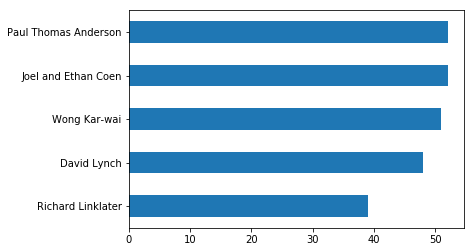

In [65]:
#TOP 5 PICKED DIRECTORS 
df_director['Director Name'].value_counts().sort_values(ascending=True).tail(5).plot(kind='barh')

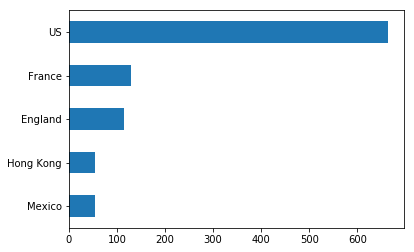

In [66]:
#TOP 5 COUNTRIES WHERE DIRECTORS COME FROM - SORTED BY THE NUMBER OF TIMES THEY WERE PICKED
# AS OPPOSED TO USE A MERGED ONE BY GETTING RID OF DUPLICATES
# BECAUSE I WANTED TO USE THE NUMBER OF TIMES EACH ONE WAS PICKED AND NOT
# JUST HIS/HER PRESENCE IN THE LIST 
df_director['Country'].value_counts().sort_values(ascending=True).tail(5).plot(kind='barh')

In [ ]:
#df_director = df_director.drop_duplicates(subset=['Director Name'], keep='first')
#df_merged = df_movies.merge(df_director, how='left', left_on='Movie Director', right_on='Director Name')

In [ ]:
#df_director.shape

In [67]:
df_merged = df_movies.merge(df_director, how='left', left_on='Movie Director', right_on='Director Name')

In [ ]:
#df_merged.shape

In [ ]:
#df_merged

In [68]:
df_count = df_director.groupby('Country')['Director Name'].value_counts().reset_index(name='count')
df_count

,Country,Director Name,count
0,,Aleksey German,1
1,,Alex Garland,1
2,,Cameron Crowe,1
3,,Charlie Kaufman,1
4,,Cristi Puiu,1
5,,Darren Aronofsky,1
6,,Don Hertzfeldt,1
7,,Jonathan Glazer,1
8,,Joss Whedon,1
9,,Larry Charles,1


In [69]:
df_count['string'] = df_count['Director Name'] + ": " + df_count['count'].map(str) + np.where(df_count['count']>1, ' times picked', ' time picked')
df_count.head()

,Country,Director Name,count,string
0,,Aleksey German,1,Aleksey German: 1 time picked
1,,Alex Garland,1,Alex Garland: 1 time picked
2,,Cameron Crowe,1,Cameron Crowe: 1 time picked
3,,Charlie Kaufman,1,Charlie Kaufman: 1 time picked
4,,Cristi Puiu,1,Cristi Puiu: 1 time picked


In [70]:
score = df_count.groupby('Country')['string'].apply(lambda x: "<p>%s</p>" % '</p><p> '.join(x)).reset_index(name='article')
score

,Country,article
0,,<p>Aleksey German: 1 time picked</p><p> Alex G...
1,Argentina,<p>Lucrecia Martel: 8 times picked</p><p> Gasp...
2,Australia,<p>George Miller: 14 times picked</p><p> Baz L...
3,Austria,<p>Michael Haneke: 35 times picked</p><p> Gerh...
4,Belgium,<p>Jean-Pierre and Luc Dardenne: 7 times picke...
5,Bosnia,<p>Danis Tanovic: 2 times picked</p>
6,Brazil,<p>Fernando Meirelles and Kátia Lund: 10 times...
7,Cameroon,<p>Jean-Marie Téno: 1 time picked</p>
8,Canada,<p>Sarah Polley: 7 times picked</p><p> David C...
9,Chad,<p>Mahamat-Saleh Haroun: 1 time picked</p>


In [71]:
directors = df_count.groupby('Country')['Director Name'].nunique().reset_index(name='headline')
score = score.merge(directors, how='left', on='Country')

In [72]:
score

,Country,article,headline
0,,<p>Aleksey German: 1 time picked</p><p> Alex G...,12
1,Argentina,<p>Lucrecia Martel: 8 times picked</p><p> Gasp...,6
2,Australia,<p>George Miller: 14 times picked</p><p> Baz L...,7
3,Austria,<p>Michael Haneke: 35 times picked</p><p> Gerh...,6
4,Belgium,<p>Jean-Pierre and Luc Dardenne: 7 times picke...,4
5,Bosnia,<p>Danis Tanovic: 2 times picked</p>,1
6,Brazil,<p>Fernando Meirelles and Kátia Lund: 10 times...,4
7,Cameroon,<p>Jean-Marie Téno: 1 time picked</p>,1
8,Canada,<p>Sarah Polley: 7 times picked</p><p> David C...,10
9,Chad,<p>Mahamat-Saleh Haroun: 1 time picked</p>,1


In [73]:
score['headline'] = score['headline'].map(str) + np.where(score['headline']>1, ' directors', ' director')

In [74]:
score

,Country,article,headline
0,,<p>Aleksey German: 1 time picked</p><p> Alex G...,12 directors
1,Argentina,<p>Lucrecia Martel: 8 times picked</p><p> Gasp...,6 directors
2,Australia,<p>George Miller: 14 times picked</p><p> Baz L...,7 directors
3,Austria,<p>Michael Haneke: 35 times picked</p><p> Gerh...,6 directors
4,Belgium,<p>Jean-Pierre and Luc Dardenne: 7 times picke...,4 directors
5,Bosnia,<p>Danis Tanovic: 2 times picked</p>,1 director
6,Brazil,<p>Fernando Meirelles and Kátia Lund: 10 times...,4 directors
7,Cameroon,<p>Jean-Marie Téno: 1 time picked</p>,1 director
8,Canada,<p>Sarah Polley: 7 times picked</p><p> David C...,10 directors
9,Chad,<p>Mahamat-Saleh Haroun: 1 time picked</p>,1 director


In [75]:
score['color'] = "#800031"
score

,Country,article,headline,color
0,,<p>Aleksey German: 1 time picked</p><p> Alex G...,12 directors,#800031
1,Argentina,<p>Lucrecia Martel: 8 times picked</p><p> Gasp...,6 directors,#800031
2,Australia,<p>George Miller: 14 times picked</p><p> Baz L...,7 directors,#800031
3,Austria,<p>Michael Haneke: 35 times picked</p><p> Gerh...,6 directors,#800031
4,Belgium,<p>Jean-Pierre and Luc Dardenne: 7 times picke...,4 directors,#800031
5,Bosnia,<p>Danis Tanovic: 2 times picked</p>,1 director,#800031
6,Brazil,<p>Fernando Meirelles and Kátia Lund: 10 times...,4 directors,#800031
7,Cameroon,<p>Jean-Marie Téno: 1 time picked</p>,1 director,#800031
8,Canada,<p>Sarah Polley: 7 times picked</p><p> David C...,10 directors,#800031
9,Chad,<p>Mahamat-Saleh Haroun: 1 time picked</p>,1 director,#800031


In [76]:
score['Country'] = score['Country'].str.replace("US", "USA")

In [77]:
score['Country'] = score['Country'].str.replace("England", "United Kingdom")

In [78]:
countries

,geometry,id,name
0,POLYGON ((-59.42394239423942 13.15673092218655...,BRB,Barbados
1,(POLYGON ((-60.90009000900089 10.8402684910687...,TTO,Trinidad & Tobago
2,(POLYGON ((-61.76417641764176 17.1198353224122...,ATG,Antigua & Barbuda
3,(POLYGON ((-61.62016201620162 12.0403634855032...,GRD,Grenada
4,POLYGON ((41.53015301530155 -1.690955985701123...,SOM,Somalia
5,"POLYGON ((73.86138613861388 36.71208383620386,...",PAK,Pakistan
6,(POLYGON ((78.21782178217825 34.81425919384228...,IND,India
7,"POLYGON ((71.34113411341136 38.24708906164336,...",AFG,Afghanistan
8,(POLYGON ((16.93969396939696 -7.20302020432483...,AGO,Angola
9,"POLYGON ((19.7839783978398 42.46137613512276, ...",ALB,Albania


In [79]:
score_new = pd.merge(score,countries[['name','geometry']],left_on='Country', right_on='name', how='left')

In [80]:
score_new

,Country,article,headline,color,name,geometry
0,,<p>Aleksey German: 1 time picked</p><p> Alex G...,12 directors,#800031,NaN,NaN
1,Argentina,<p>Lucrecia Martel: 8 times picked</p><p> Gasp...,6 directors,#800031,Argentina,(POLYGON ((-68.64086408640864 -54.885864343659...
2,Australia,<p>George Miller: 14 times picked</p><p> Baz L...,7 directors,#800031,Australia,(POLYGON ((73.35733573357336 -53.0159488872151...
3,Austria,<p>Michael Haneke: 35 times picked</p><p> Gerh...,6 directors,#800031,Austria,"POLYGON ((16.07560756075608 48.74094296646624,..."
4,Belgium,<p>Jean-Pierre and Luc Dardenne: 7 times picke...,4 directors,#800031,Belgium,"POLYGON ((5.022502250225017 51.47604318634029,..."
5,Bosnia,<p>Danis Tanovic: 2 times picked</p>,1 director,#800031,NaN,NaN
6,Brazil,<p>Fernando Meirelles and Kátia Lund: 10 times...,4 directors,#800031,Brazil,(POLYGON ((-48.55085508550854 -27.813954004089...
7,Cameroon,<p>Jean-Marie Téno: 1 time picked</p>,1 director,#800031,Cameroon,"POLYGON ((14.56345634563456 12.76600231934741,..."
8,Canada,<p>Sarah Polley: 7 times picked</p><p> David C...,10 directors,#800031,Canada,(POLYGON ((-66.76867686768676 44.7499293803234...
9,Chad,<p>Mahamat-Saleh Haroun: 1 time picked</p>,1 director,#800031,Chad,"POLYGON ((23.99639963996401 15.7243760265581, ..."


In [81]:
score_new['group_id'] = 1

In [82]:
output_new.head()

,crit_cn,article,headline,color,name,geometry,group_id
0,Argentina,<p> Spirited Away : 2 votes</p><p> Adventurel...,2 critics,#000066,Argentina,(POLYGON ((-68.64086408640864 -54.885864343659...,0
1,Australia,<p> A Separation : 2 votes</p><p> A Vingança ...,4 critics,#000066,Australia,(POLYGON ((73.35733573357336 -53.0159488872151...,0
2,Austria,<p> Platform : 2 votes</p><p> Secret Sunshine...,2 critics,#000066,Austria,"POLYGON ((16.07560756075608 48.74094296646624,...",0
3,Bangladesh,<p> A Separation : 1 vote</p><p> Babel : 1 vo...,1 critic,#000066,Bangladesh,(POLYGON ((91.93519351935197 21.71089640577222...,0
4,Belgium,<p> Amores Perros : 1 vote</p><p> Boyhood : 1...,1 critic,#000066,Belgium,"POLYGON ((5.022502250225017 51.47604318634029,...",0


In [83]:
#MAKING SURE THE COLUMN NAMES ARE THE SAME IN BOTH GEODATAFRAMES I WILL MERGE 
output_new = output_new.rename(columns={'crit_cn': 'Country'})

In [84]:
output_new.head()

,Country,article,headline,color,name,geometry,group_id
0,Argentina,<p> Spirited Away : 2 votes</p><p> Adventurel...,2 critics,#000066,Argentina,(POLYGON ((-68.64086408640864 -54.885864343659...,0
1,Australia,<p> A Separation : 2 votes</p><p> A Vingança ...,4 critics,#000066,Australia,(POLYGON ((73.35733573357336 -53.0159488872151...,0
2,Austria,<p> Platform : 2 votes</p><p> Secret Sunshine...,2 critics,#000066,Austria,"POLYGON ((16.07560756075608 48.74094296646624,...",0
3,Bangladesh,<p> A Separation : 1 vote</p><p> Babel : 1 vo...,1 critic,#000066,Bangladesh,(POLYGON ((91.93519351935197 21.71089640577222...,0
4,Belgium,<p> Amores Perros : 1 vote</p><p> Boyhood : 1...,1 critic,#000066,Belgium,"POLYGON ((5.022502250225017 51.47604318634029,...",0


In [85]:
score_new.head()

,Country,article,headline,color,name,geometry,group_id
0,,<p>Aleksey German: 1 time picked</p><p> Alex G...,12 directors,#800031,NaN,NaN,1
1,Argentina,<p>Lucrecia Martel: 8 times picked</p><p> Gasp...,6 directors,#800031,Argentina,(POLYGON ((-68.64086408640864 -54.885864343659...,1
2,Australia,<p>George Miller: 14 times picked</p><p> Baz L...,7 directors,#800031,Australia,(POLYGON ((73.35733573357336 -53.0159488872151...,1
3,Austria,<p>Michael Haneke: 35 times picked</p><p> Gerh...,6 directors,#800031,Austria,"POLYGON ((16.07560756075608 48.74094296646624,...",1
4,Belgium,<p>Jean-Pierre and Luc Dardenne: 7 times picke...,4 directors,#800031,Belgium,"POLYGON ((5.022502250225017 51.47604318634029,...",1


In [86]:
# LAST STEP IS GETTING RID OF ANY ROW IN THE GEOMETRY COLUMN THAT HAS NAN VALUES
score_new.dropna(subset=['geometry'], inplace=True)

In [87]:
# APPENDING FIRST DATAFRAME (CRITICS) TO THE SECOND 
df_final = output_new.append(score_new, ignore_index=True)

In [88]:
from geopandas import GeoDataFrame
geo_output2 = GeoDataFrame(df_final)

In [92]:
geo_output2.dropna().to_file("final_project_lab.geojson", driver='GeoJSON')